## Implementation
This kernel uses multiple classification algorithms as below
<ul>
    <li>Multi-layer Perceptron classifier (MLP) - Neural Networks</li>
    <li>KNeighborsClassifier - Instance-Based Learning</li>
    <li>AdaBoostClassifier - Ensemble Learning</li>
    <li>BaggingClassifier - Ensemble Learning</li>
    <li>GradientBoostingClassifier - Ensemble Learning</li>
    <li>RandomForestClassifier - Ensemble Learning</li>
</ul>
    
Also this kernel does lot of indepth EDA like 
<ul>
    <li>univalirate analysis</li>
    <li>bivariate analysis</li>
    <li>correlation analysis</li>
</ul>

This kernel utilize the below methods for evaluation of model accuracy
<ul>
    <li>auc</li>
    <li>classification report</li>
    <li>confusion matrix</li>
</ul>

## General Library Imports

In [190]:
#  Install the Tensorflow library using pip as the Python package manager.
!pip install tensorflow

In [191]:
!pip install seaborn --upgrade

In [192]:
!pip install --user matplotlib==3.7.3

In [193]:
!pip install scikeras

In [194]:
# Import the necessary modules
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ChatGPT - DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, concatenate
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam

# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# Libraries for Metrics evaluation
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

## Data loading

In [195]:
project_data = pd.read_csv("./dataset/Employee Analysis Attrition Report/HR Employee Attrition.csv")

##  Analysis of the Data

In [196]:
project_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [197]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [198]:
project_data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [199]:
project_data.shape

(1470, 35)

In [200]:
project_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [201]:
project_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Eploratory Data Analysis

### univariate Analysis

In [202]:
numeric_columns = [column for column in project_data.columns if project_data[column].dtype == 'int64']
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


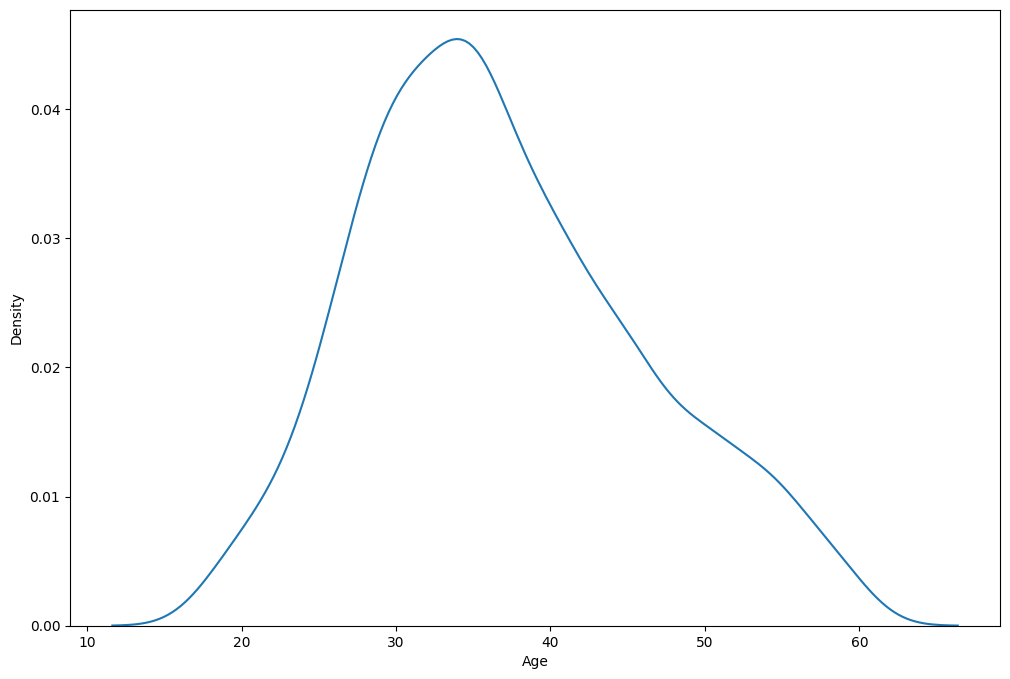

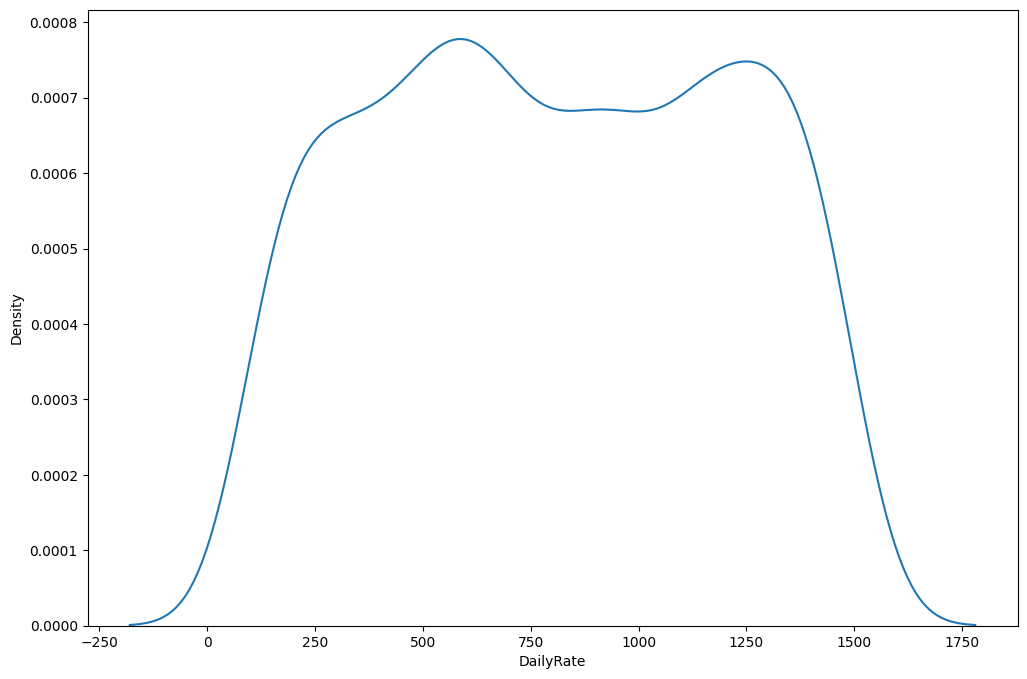

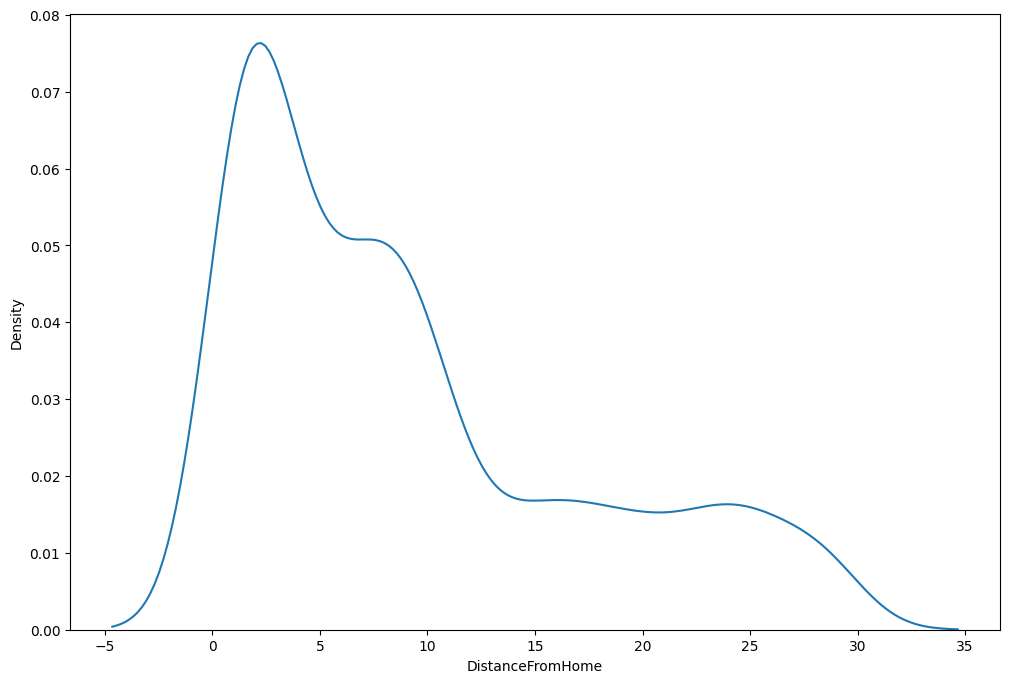

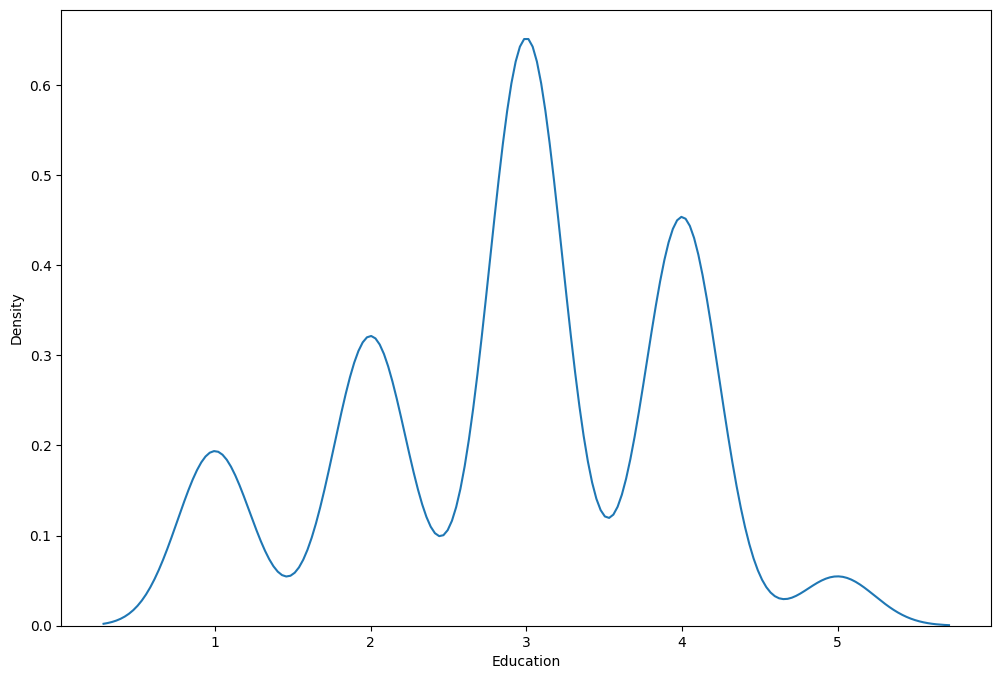

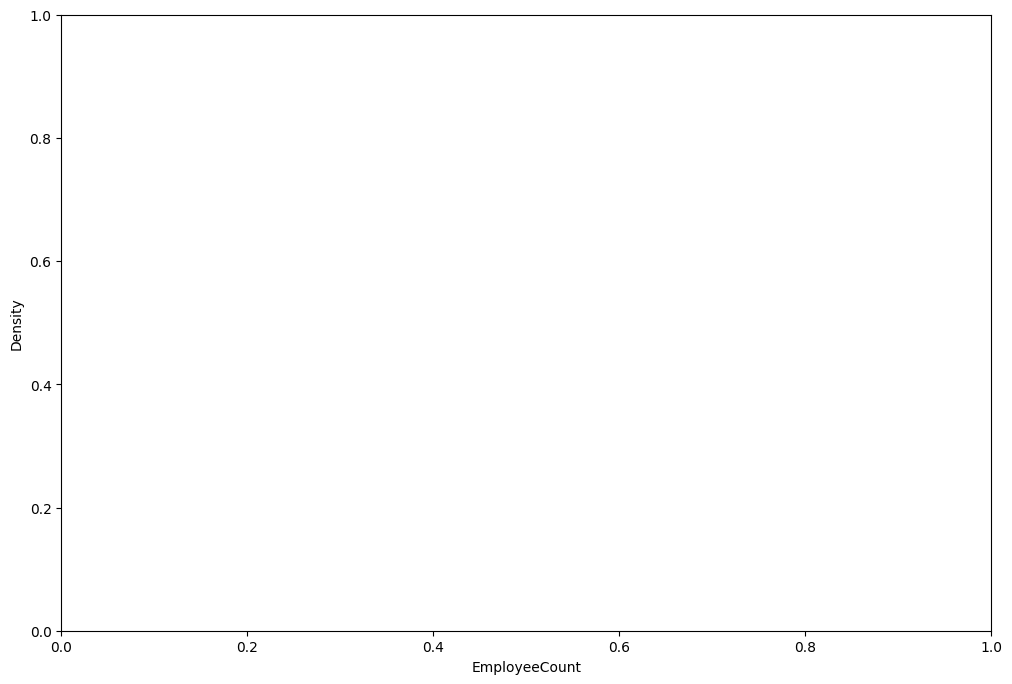

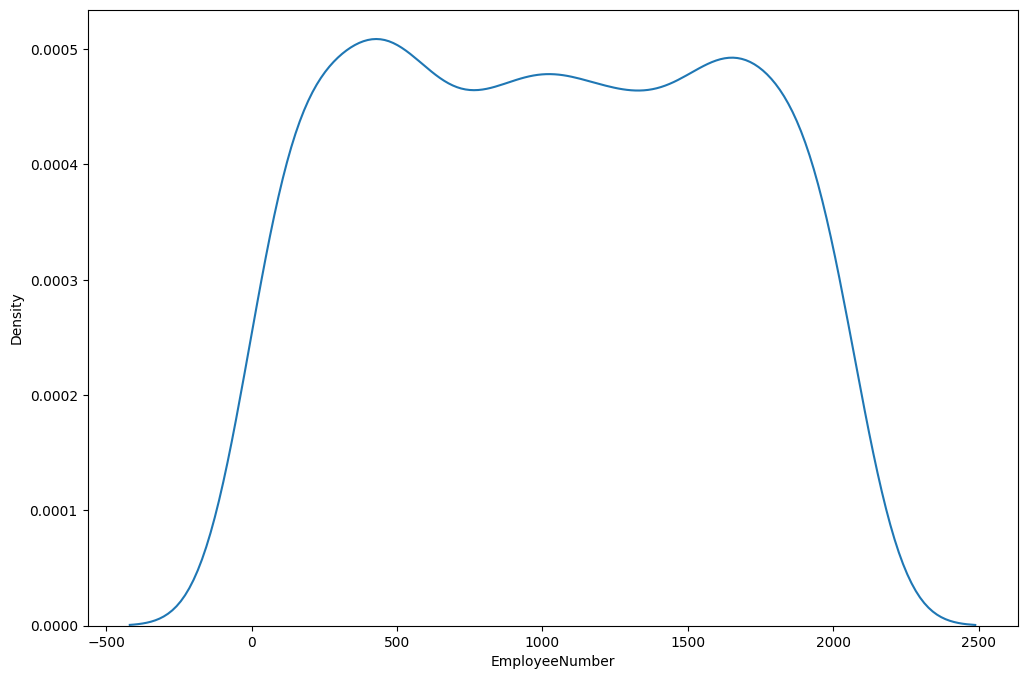

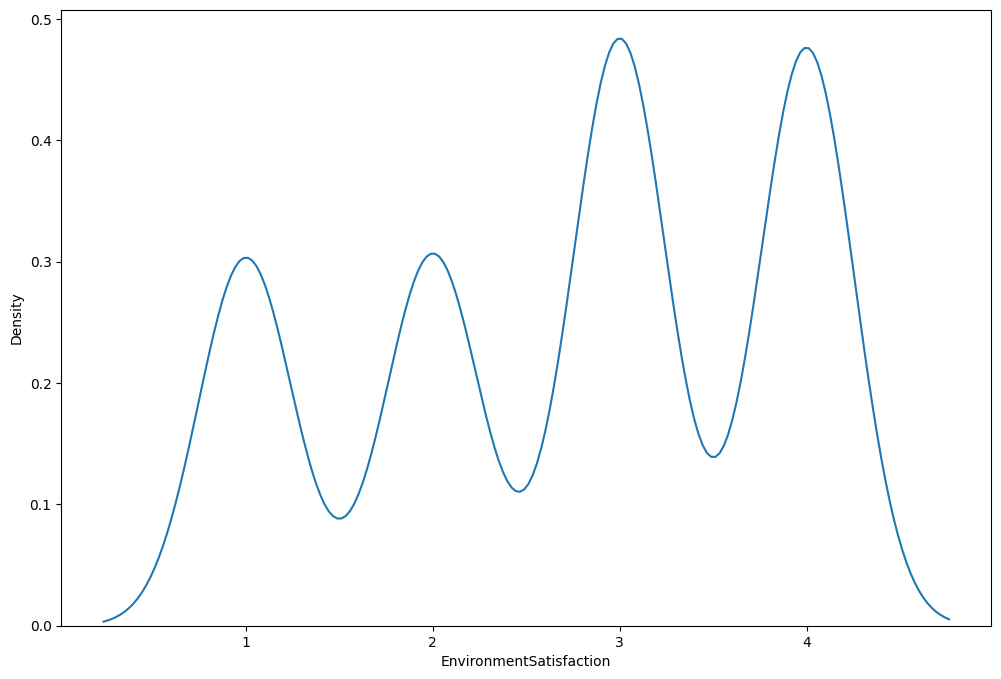

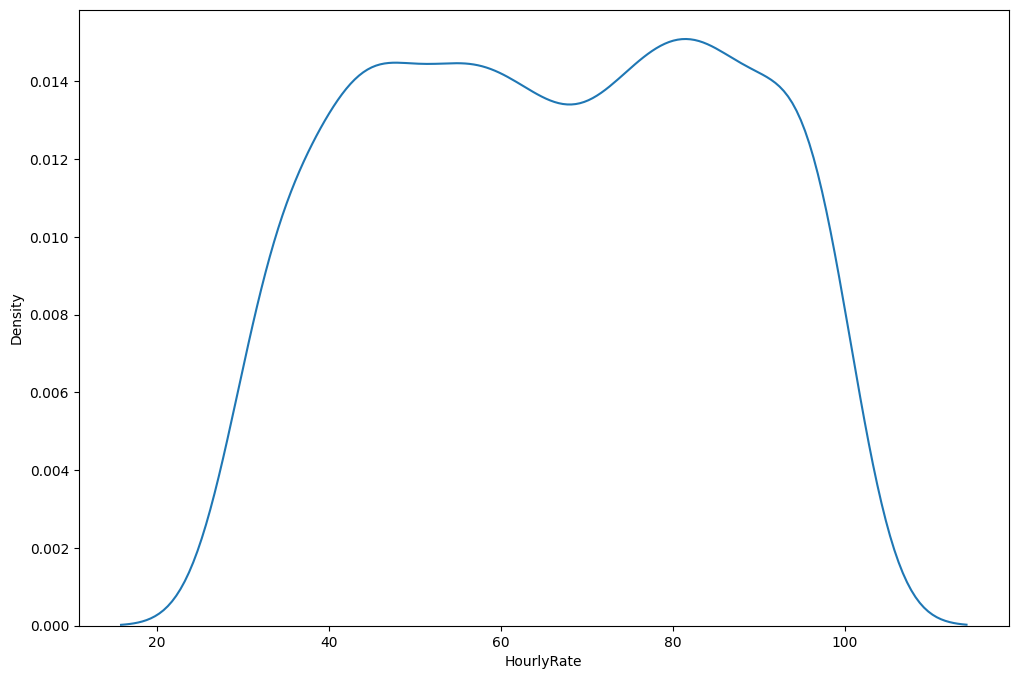

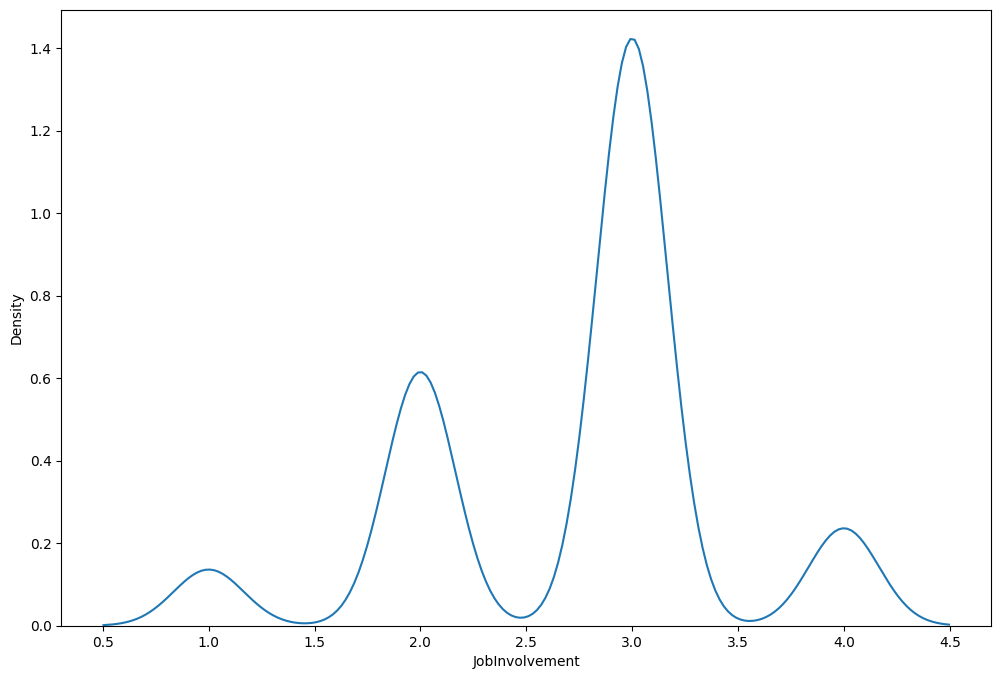

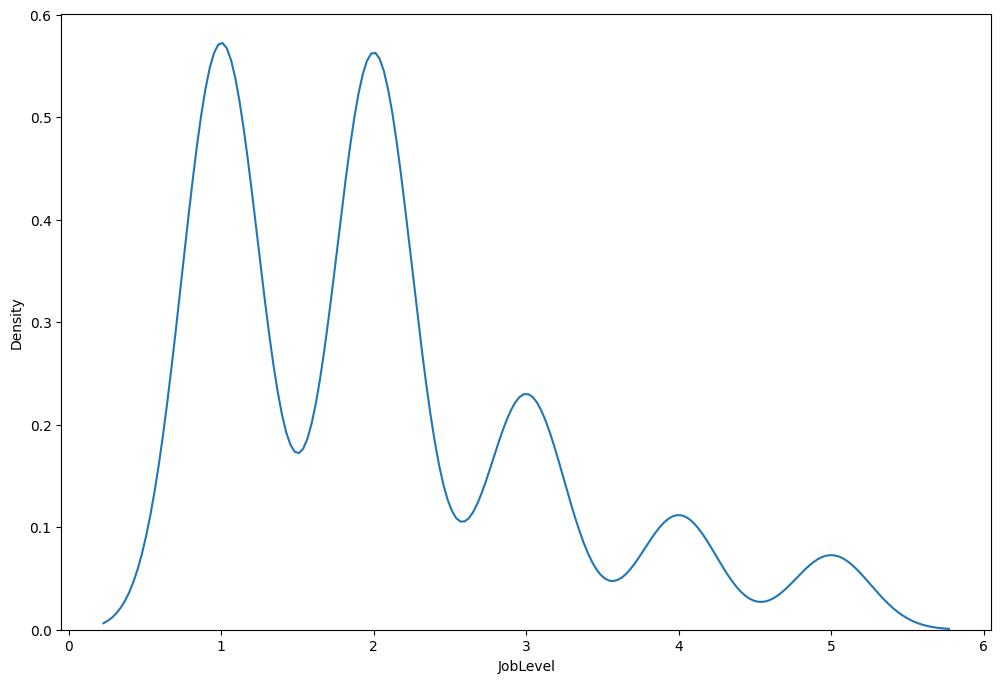

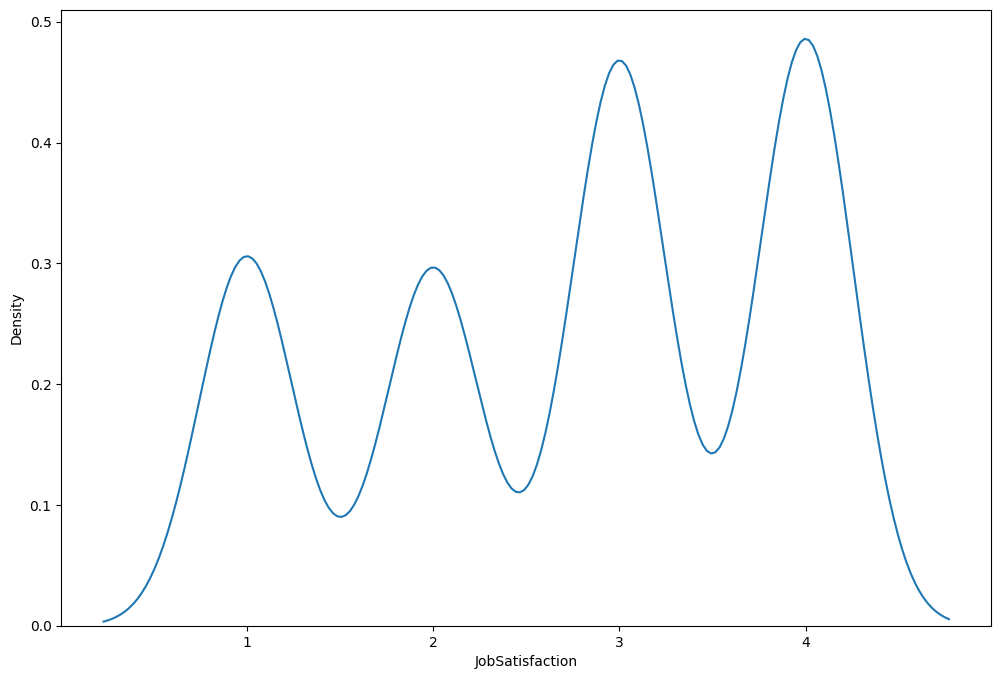

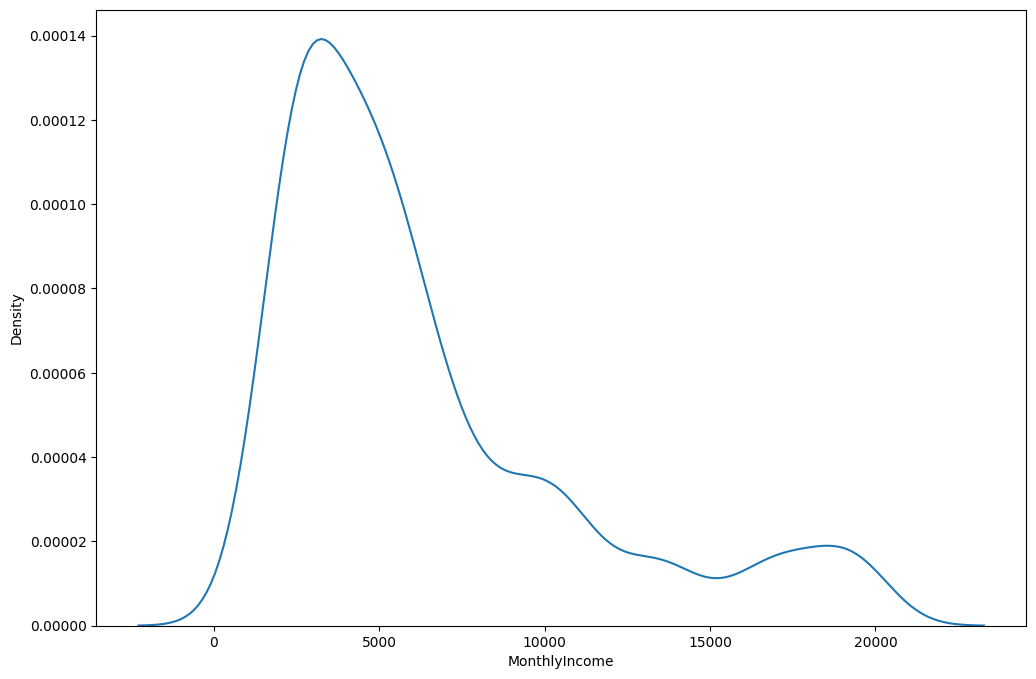

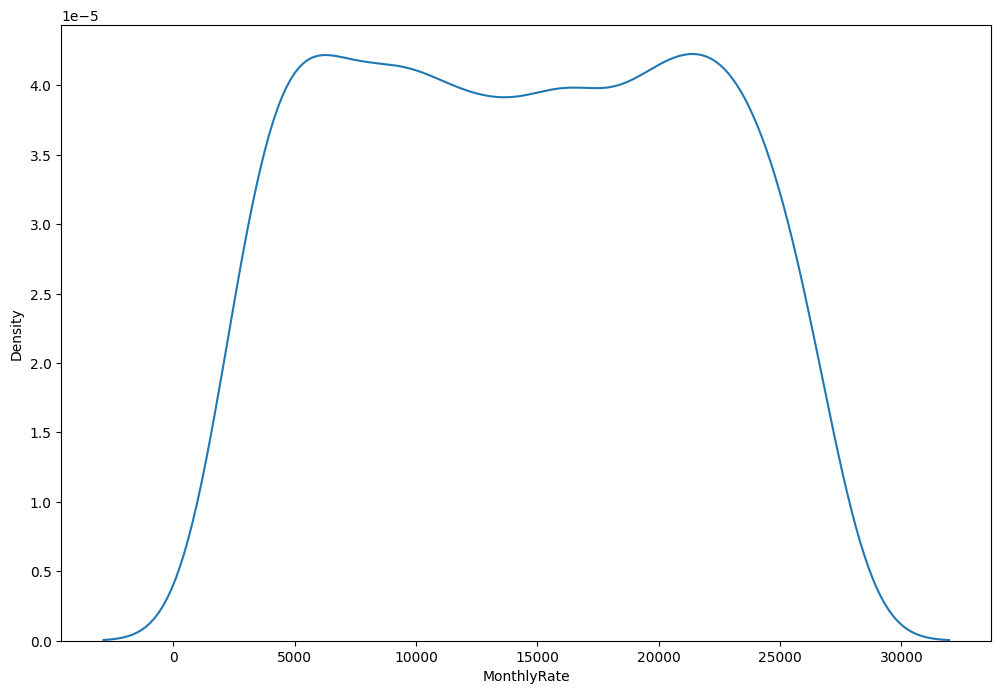

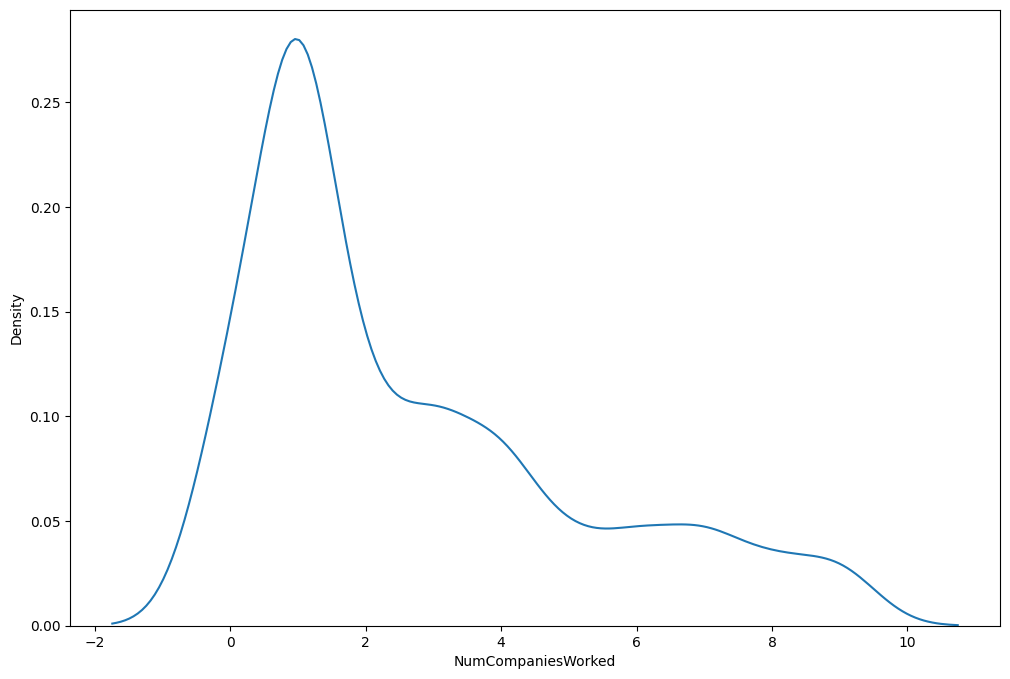

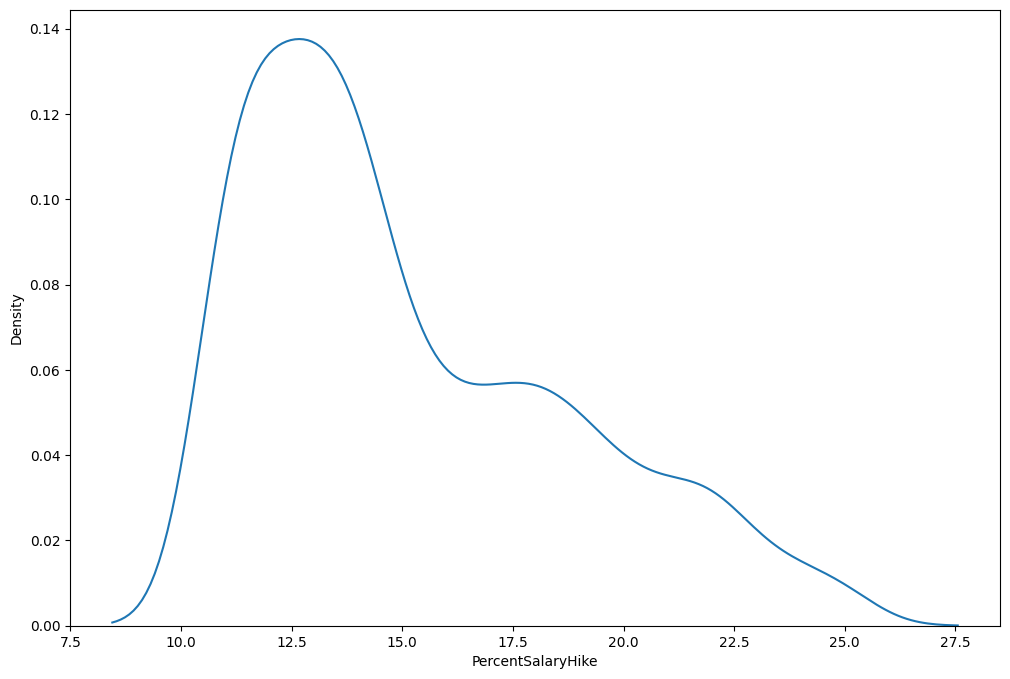

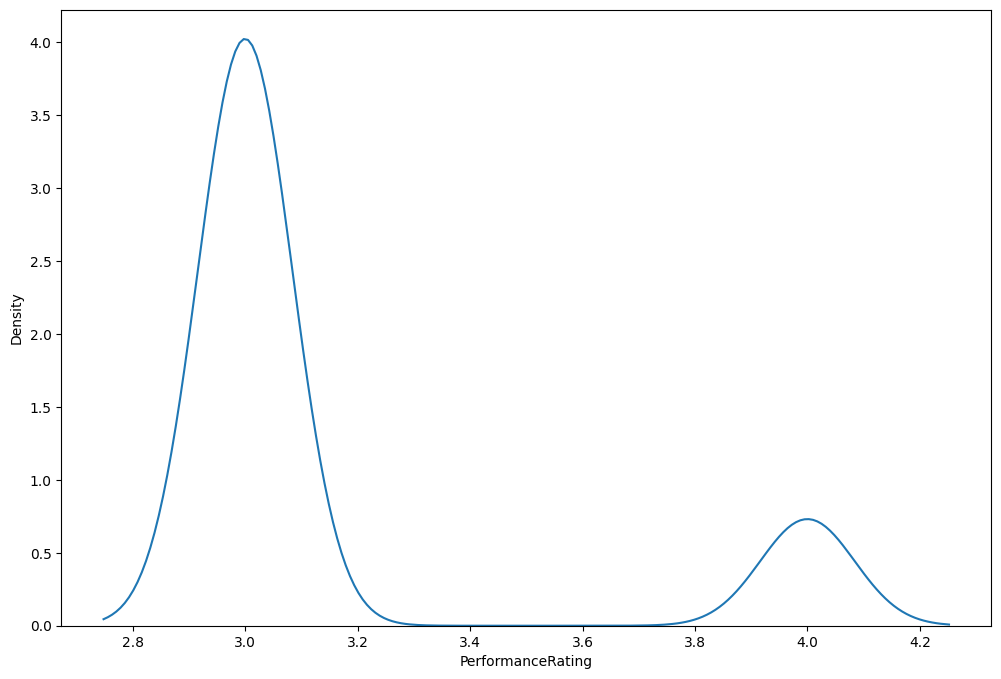

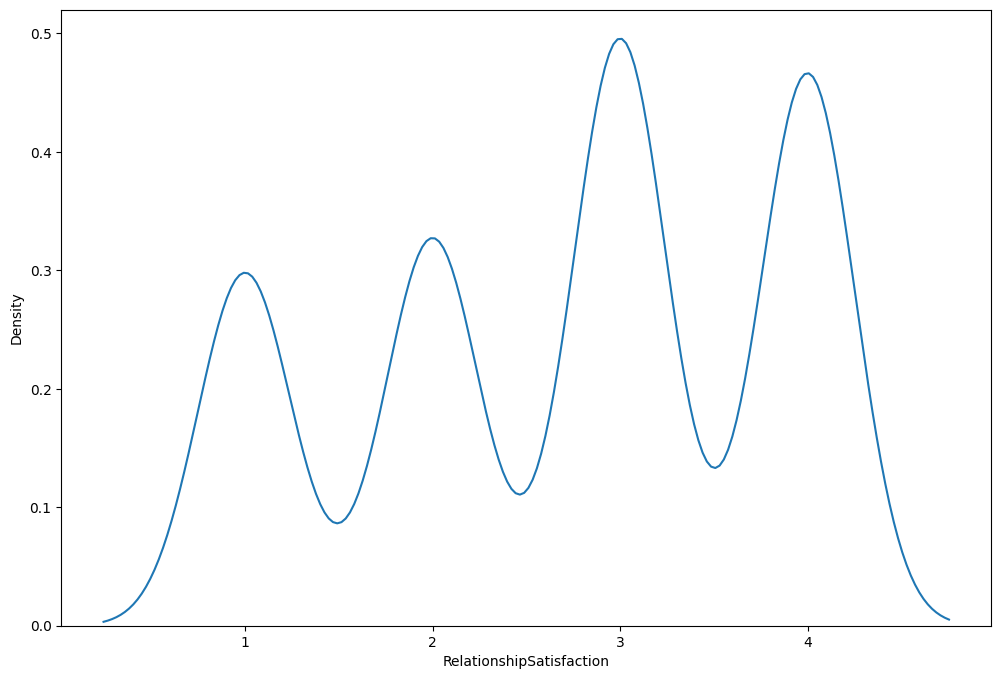

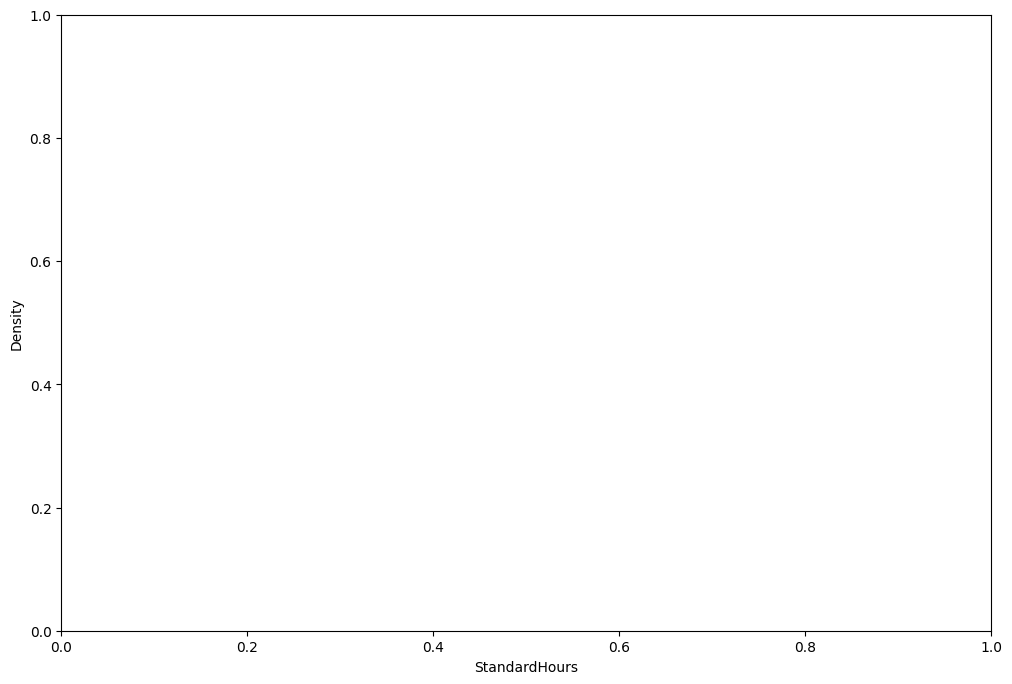

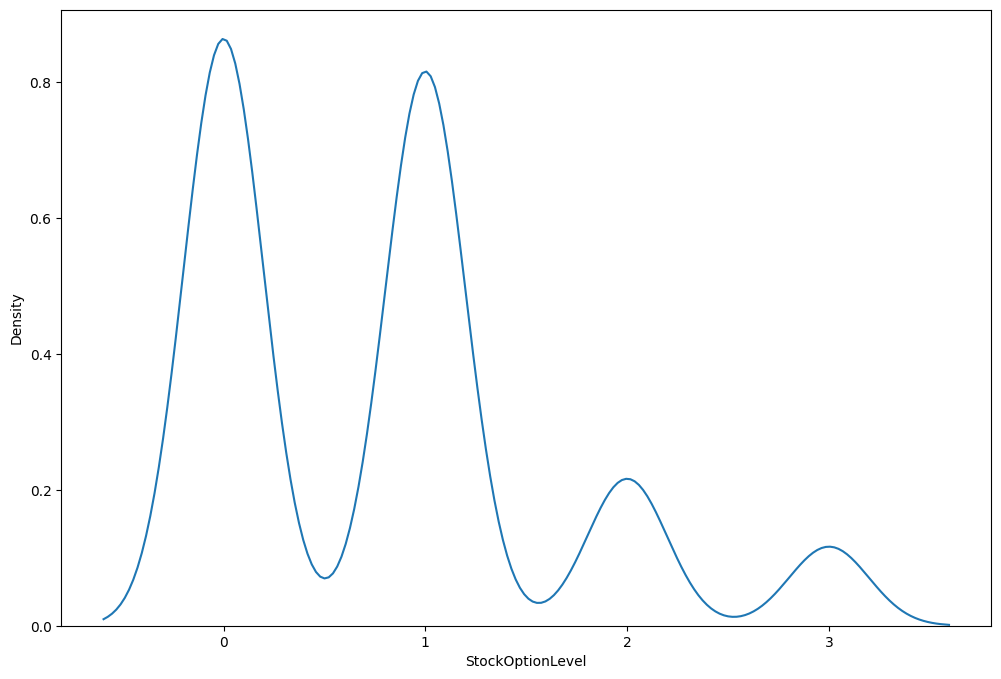

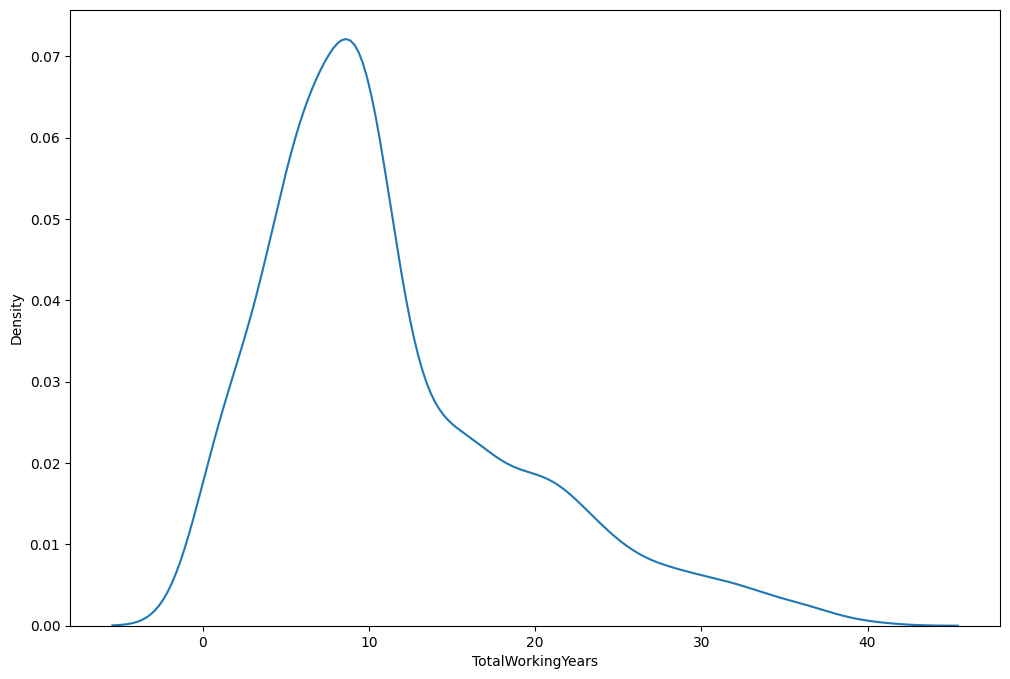

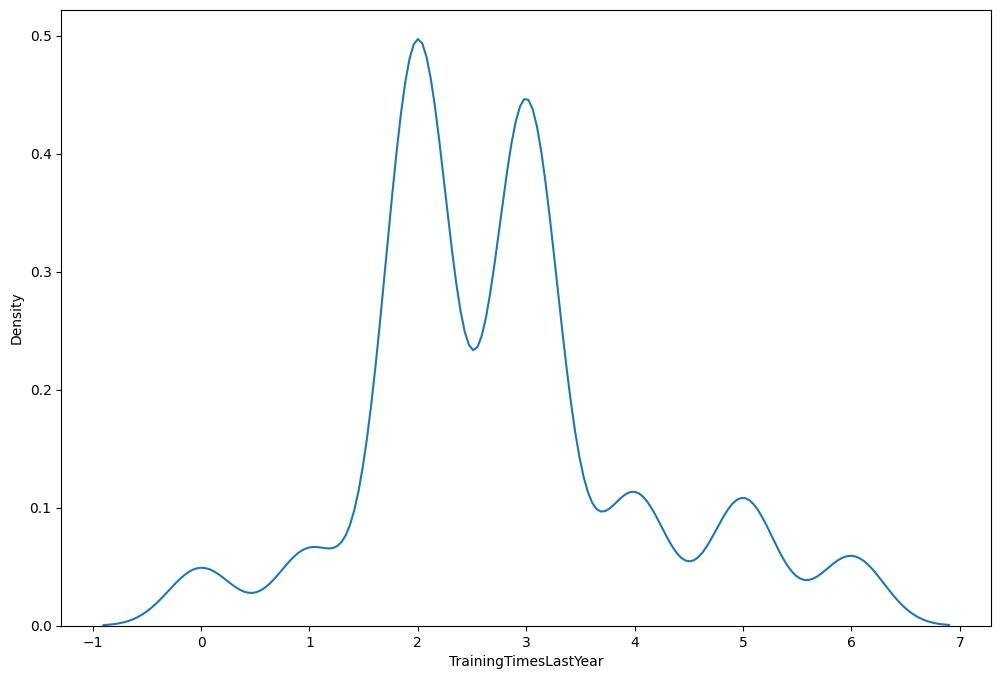

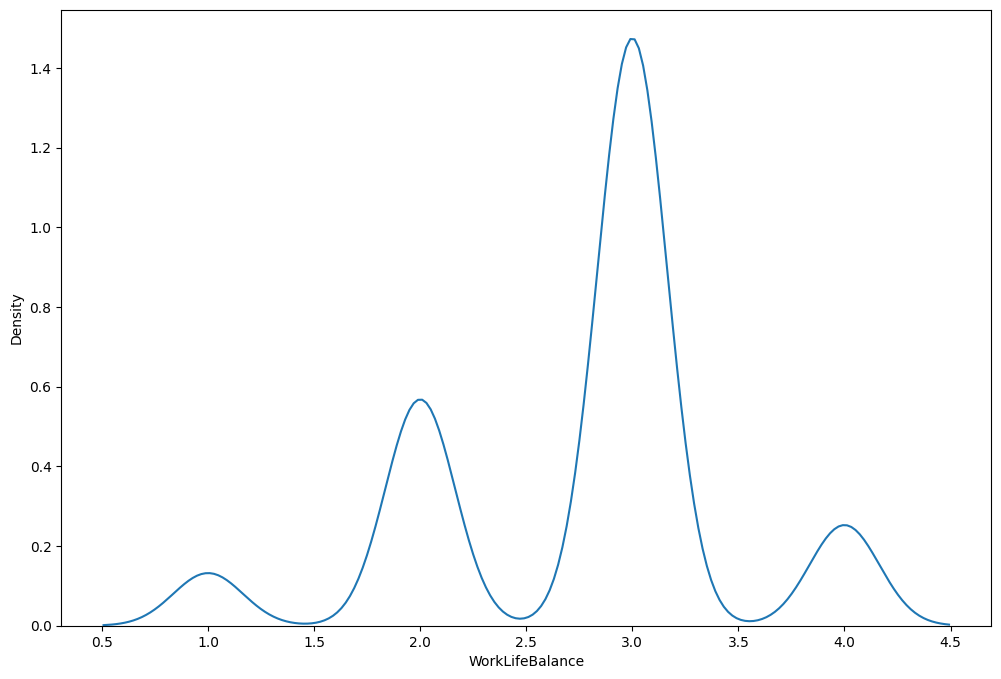

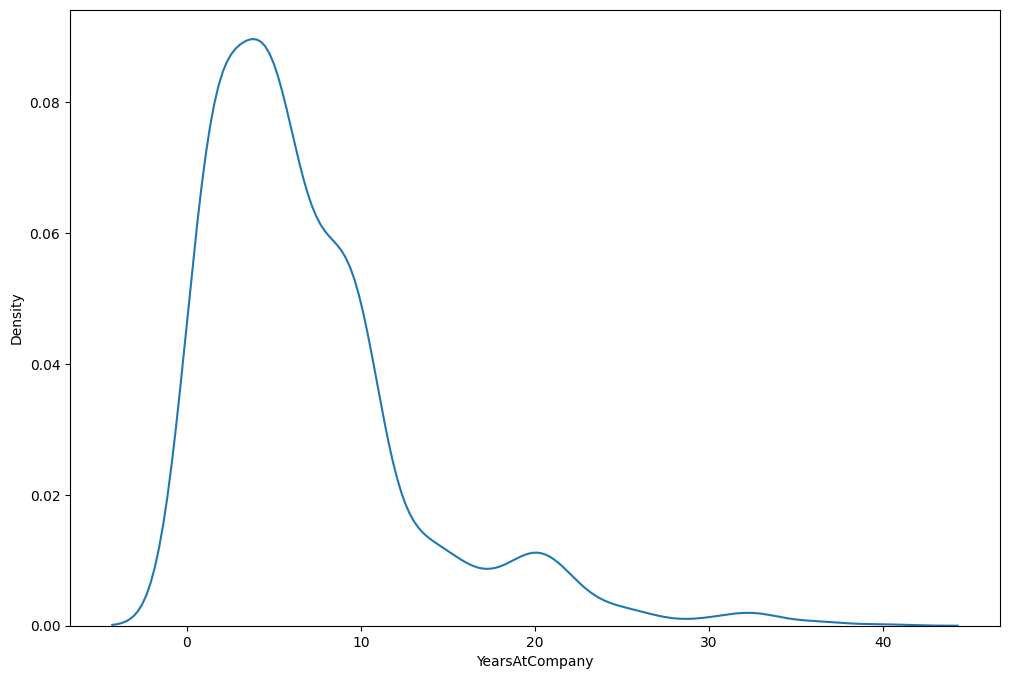

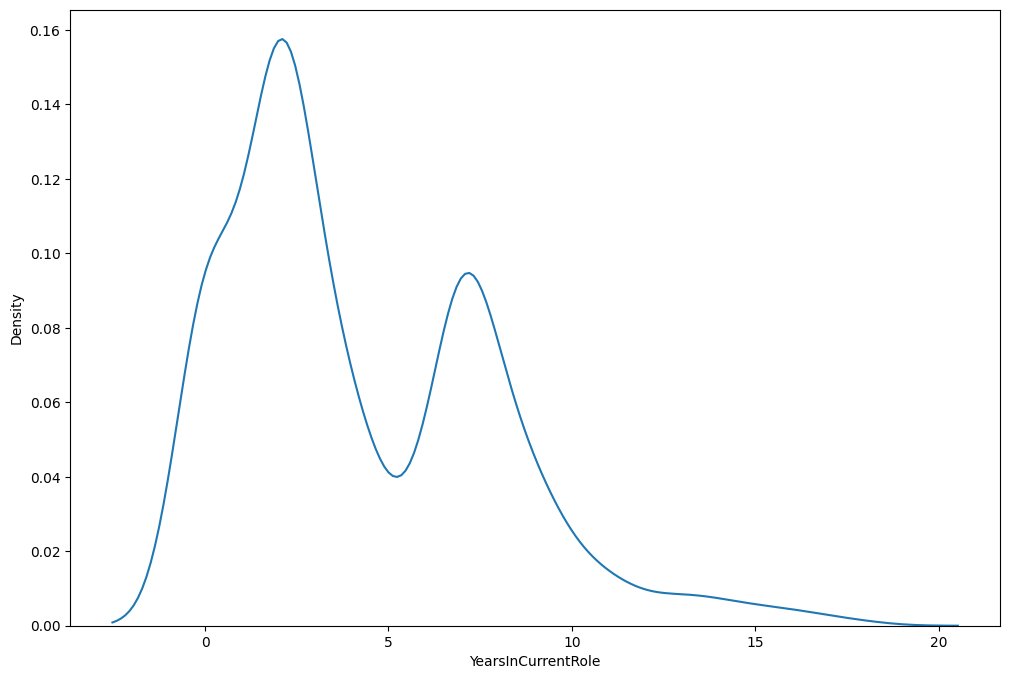

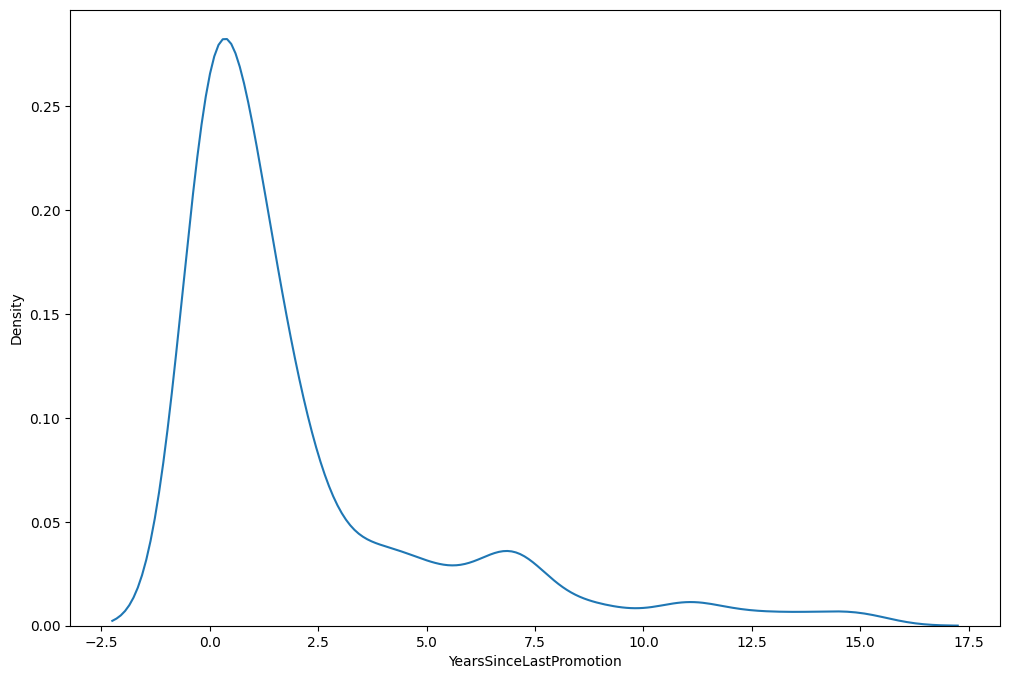

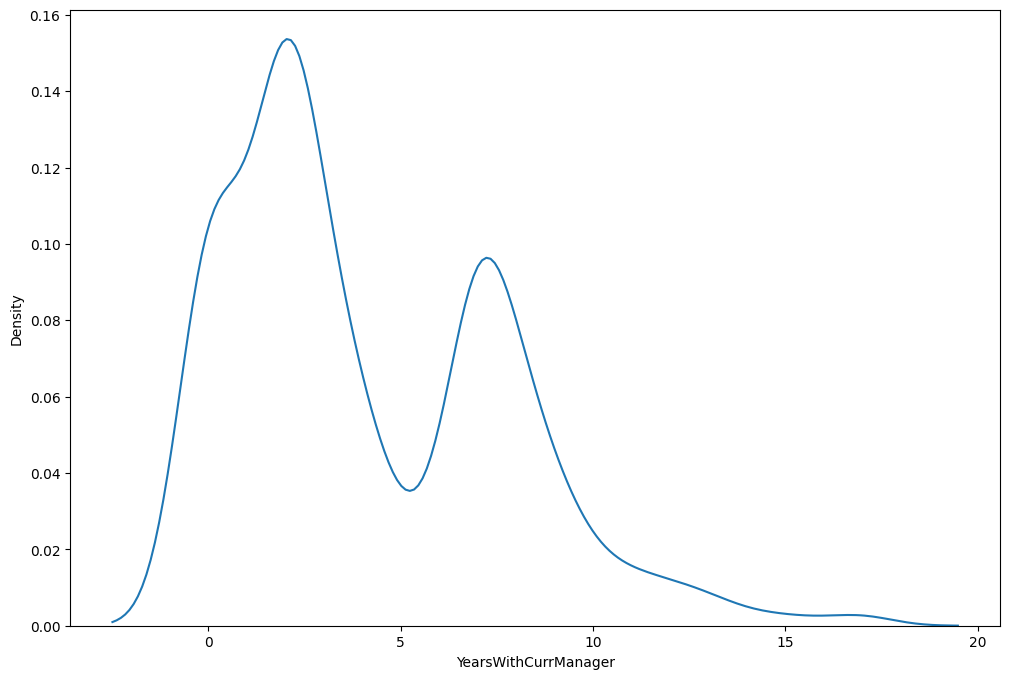

In [203]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=project_data, x=column, palette="crest")
    plt.show()

In [204]:
categorical_columns = [column for column in project_data.columns if project_data[column].dtype != 'int64']
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


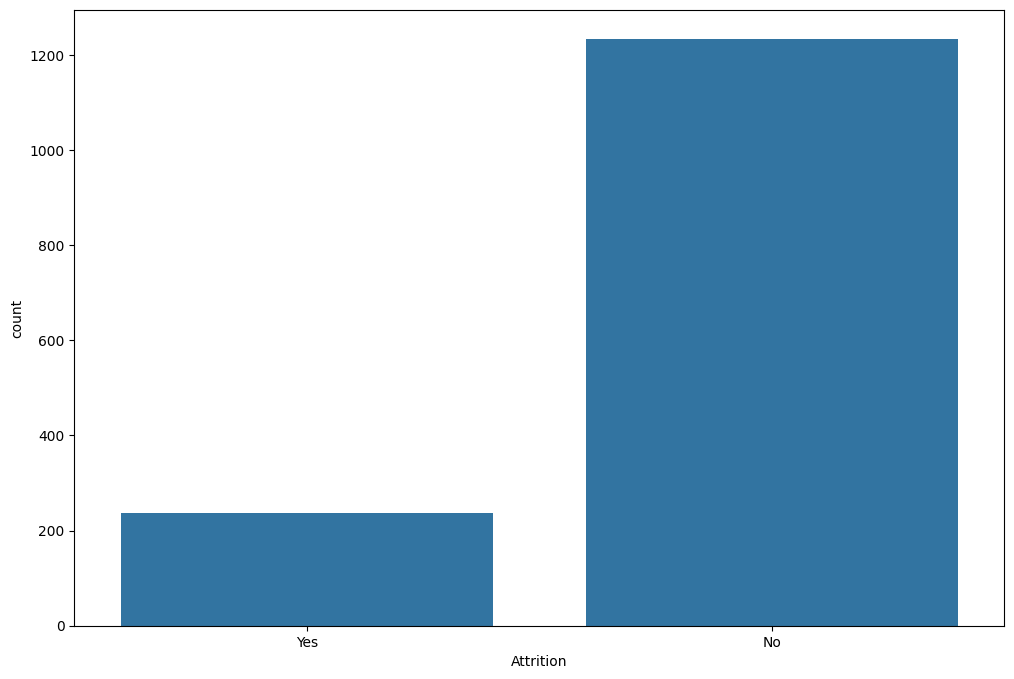

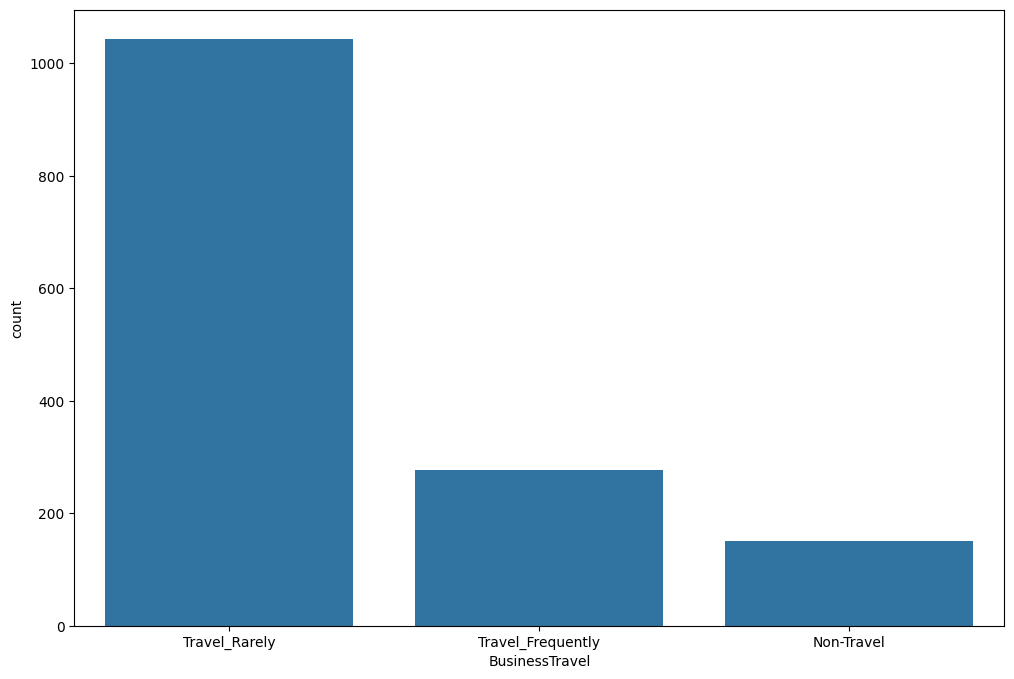

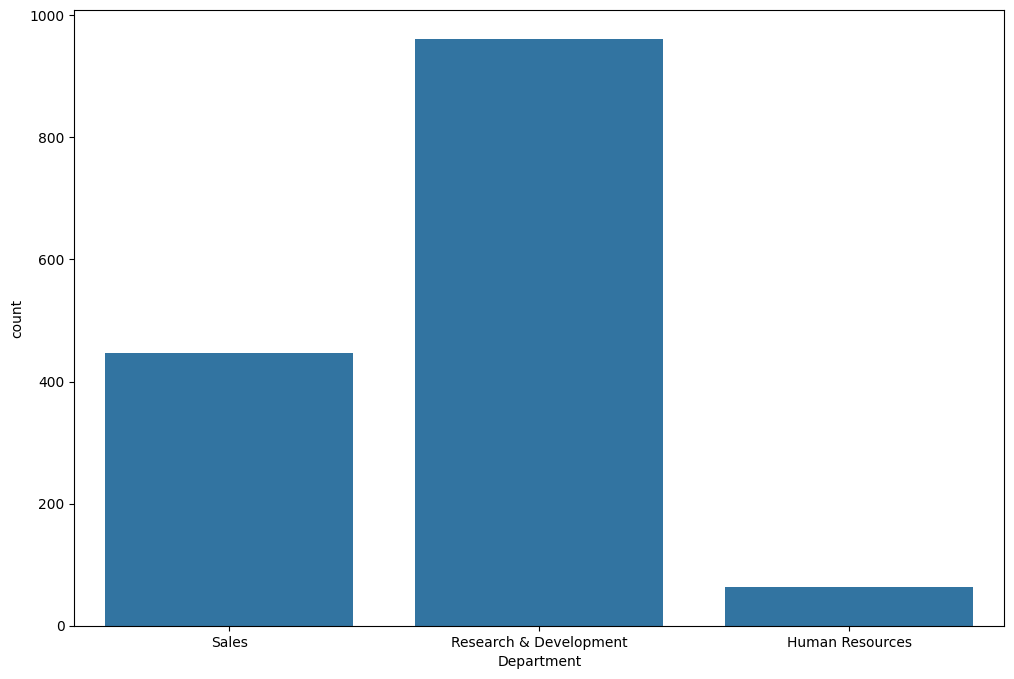

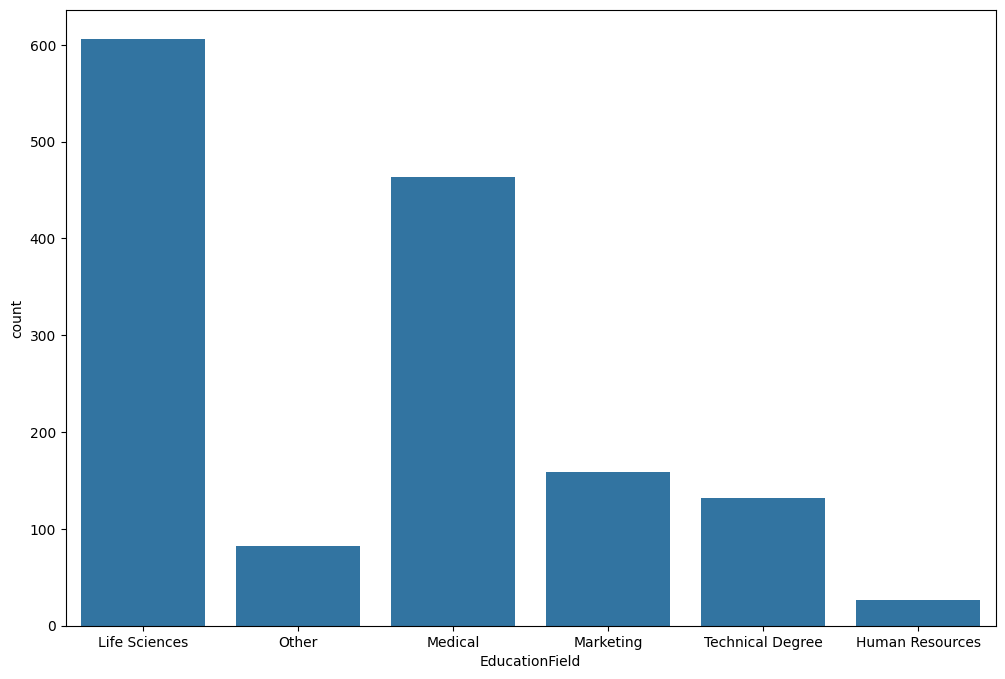

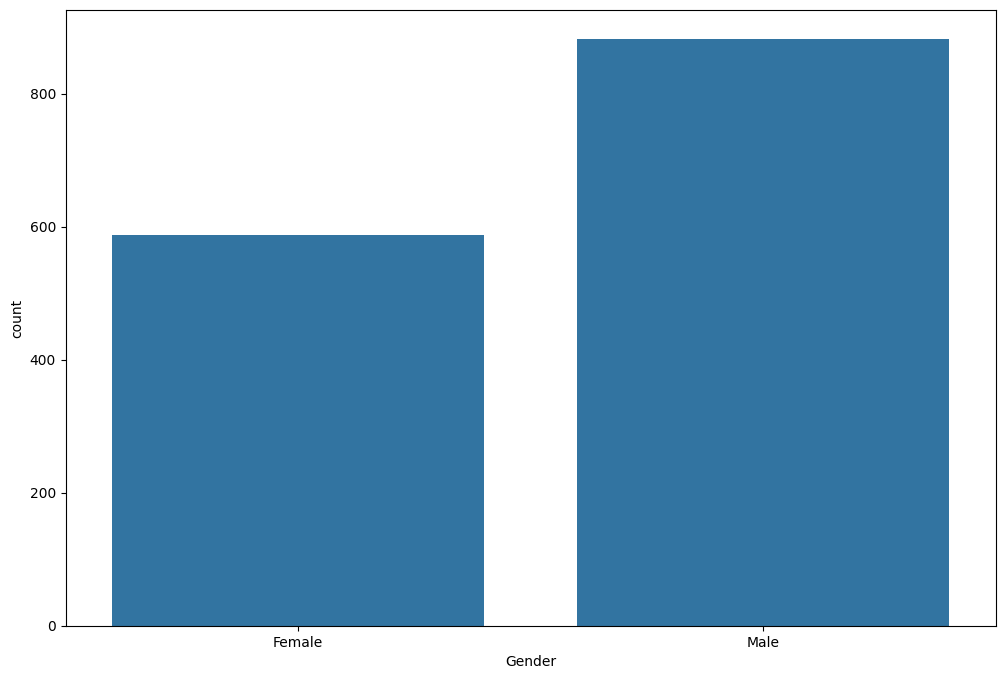

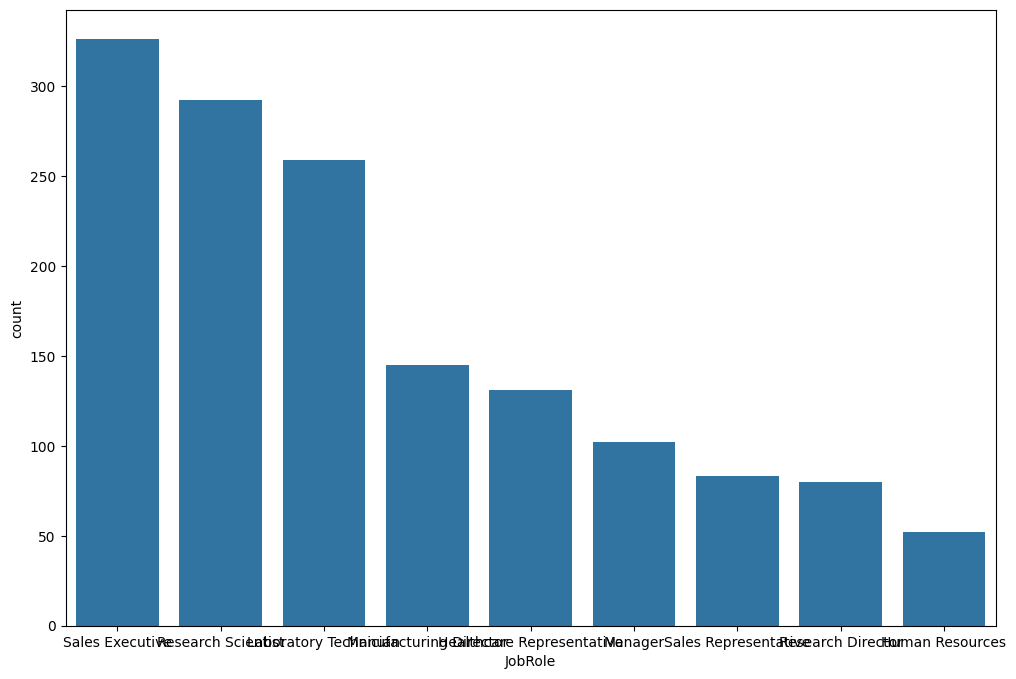

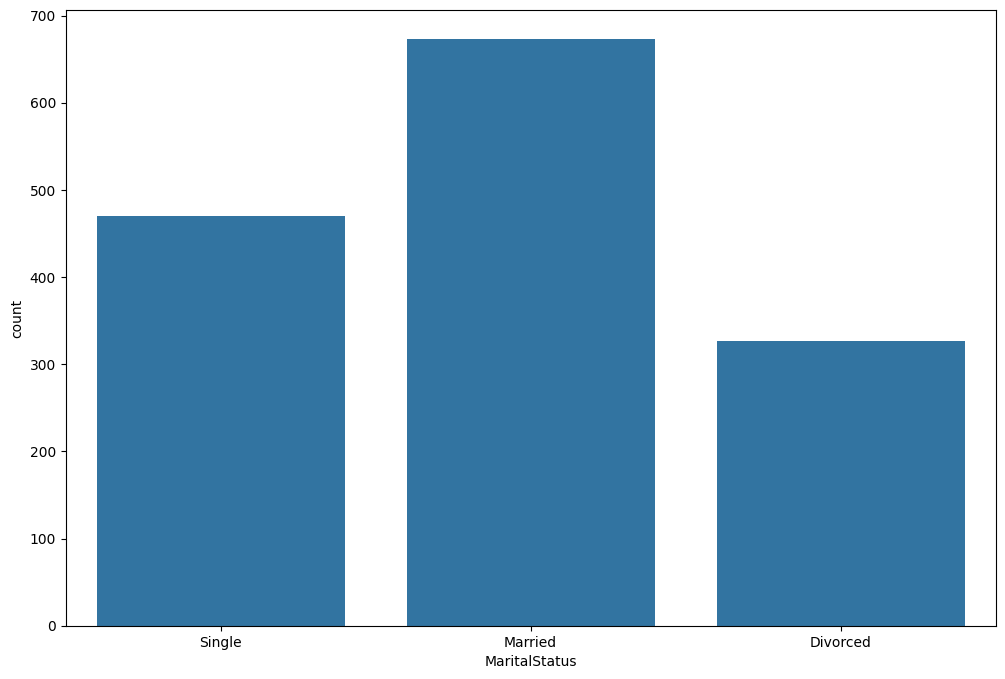

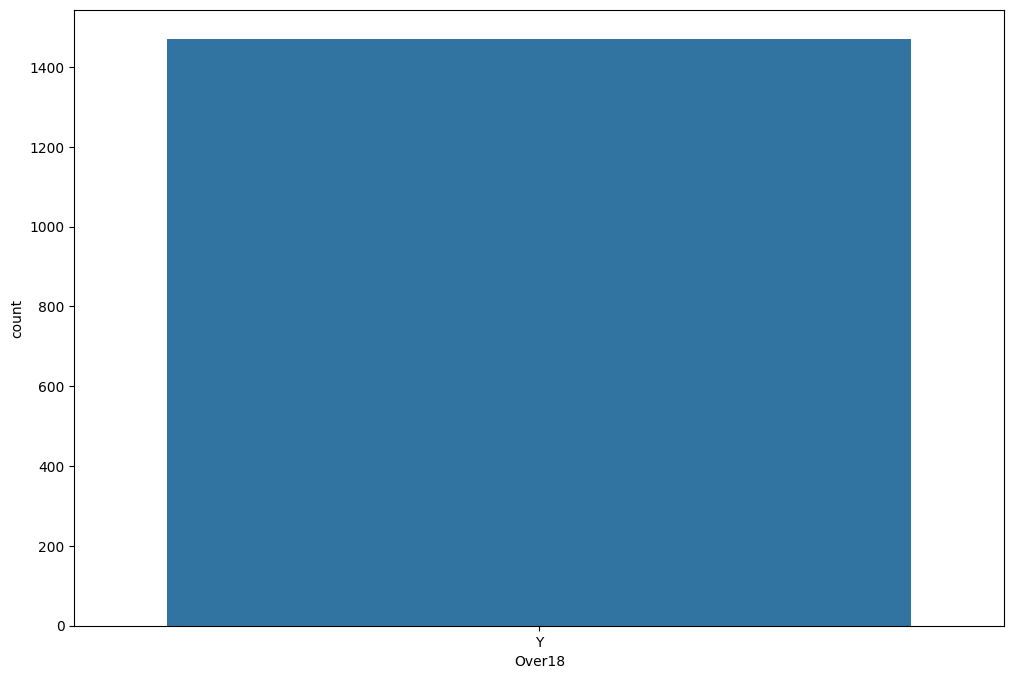

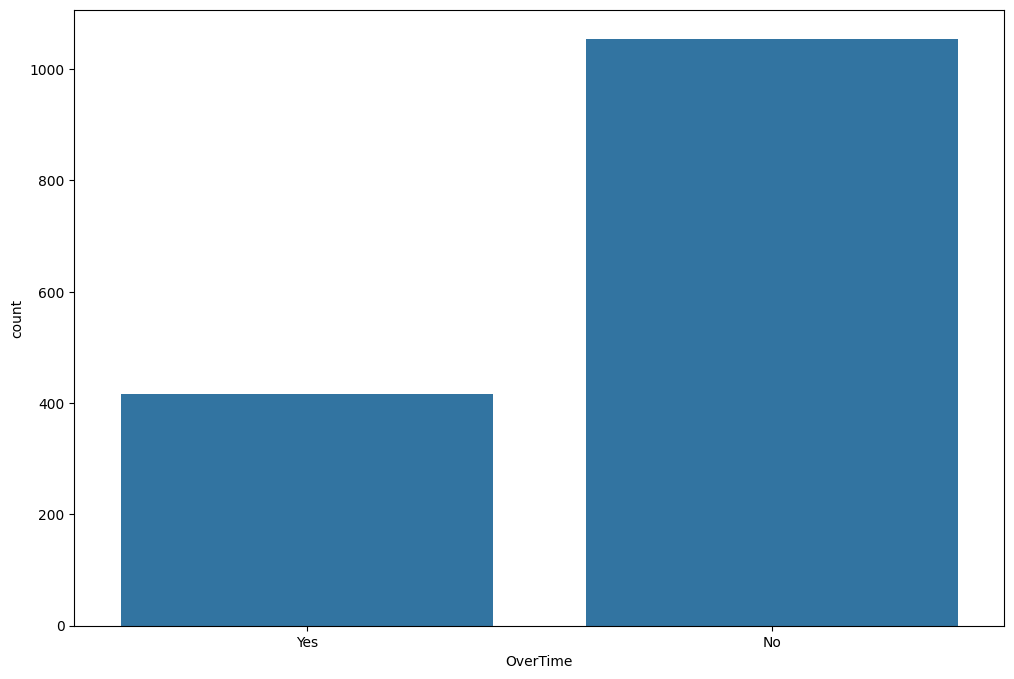

In [205]:
for column in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=project_data[column])
    plt.show()

### Bivariate Analysis

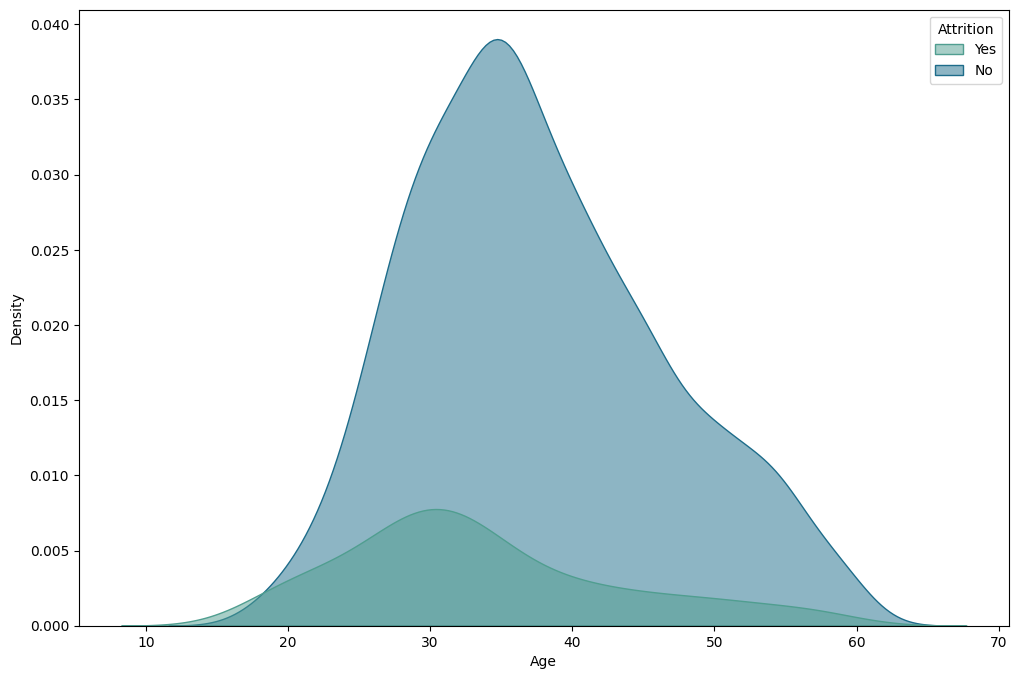

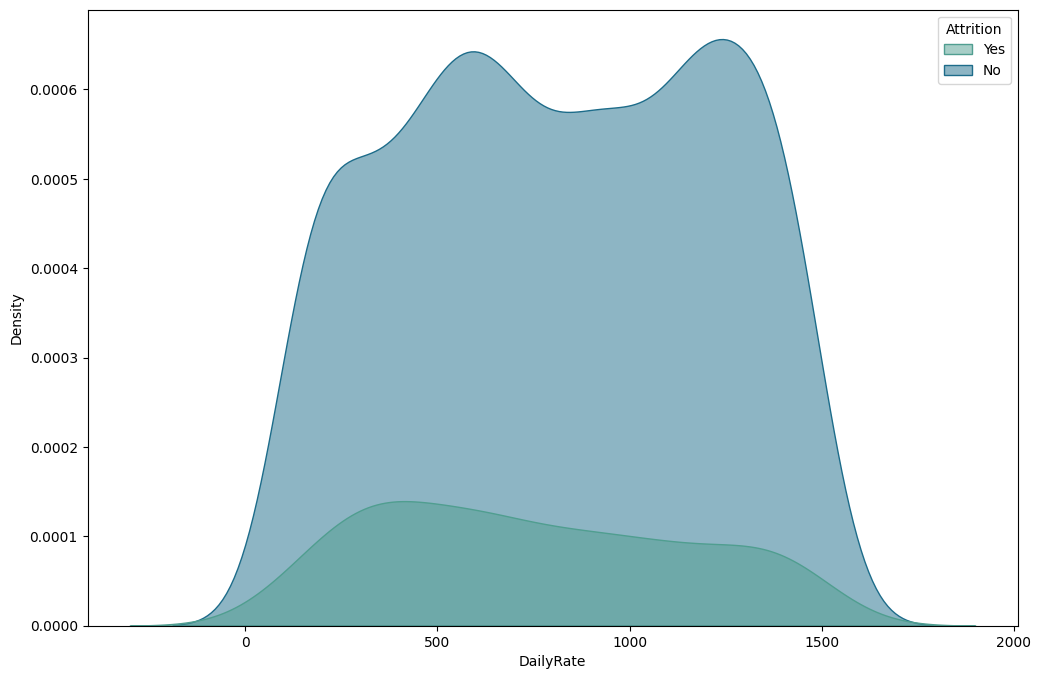

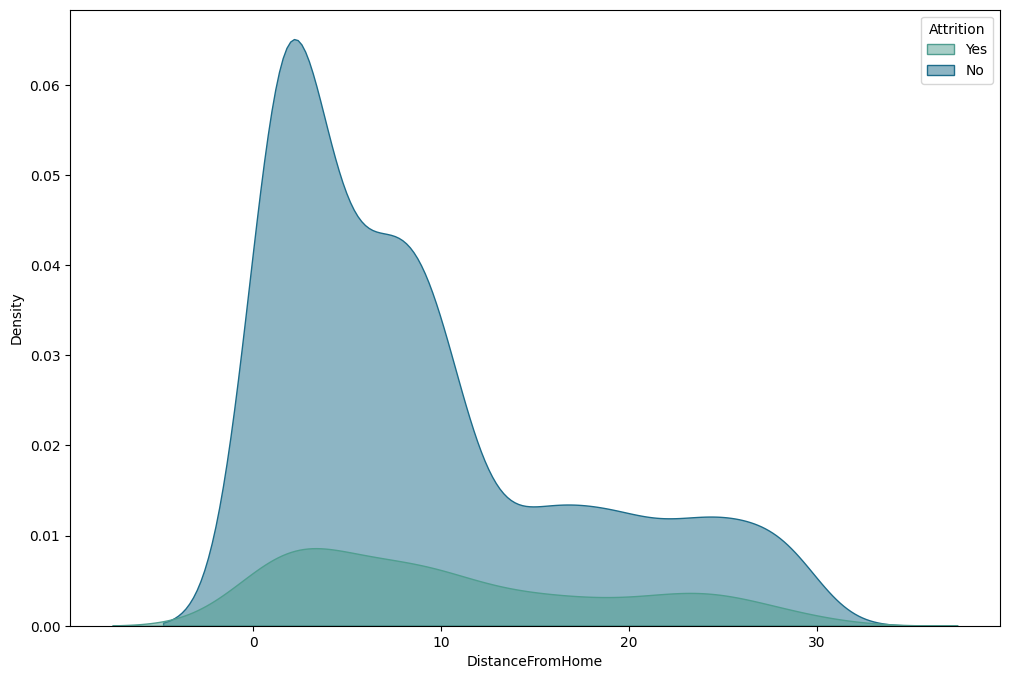

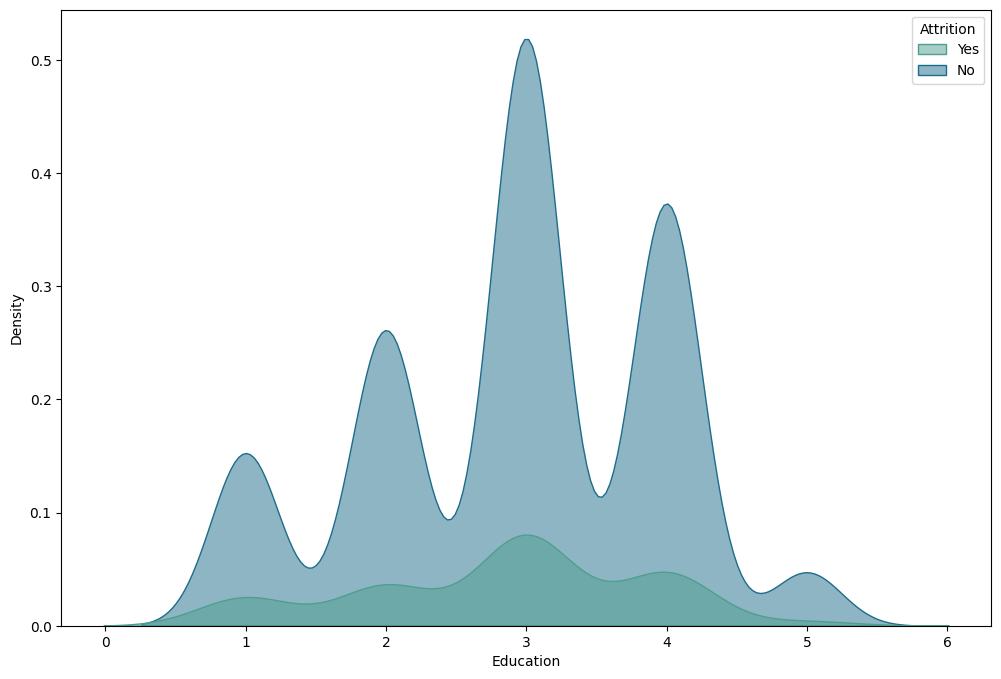

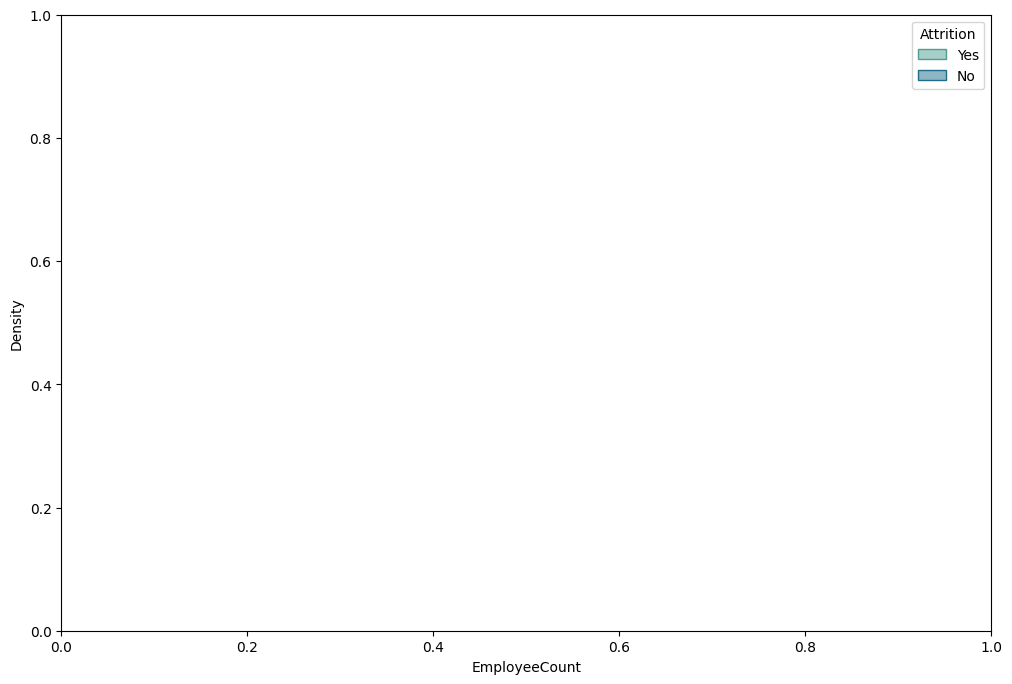

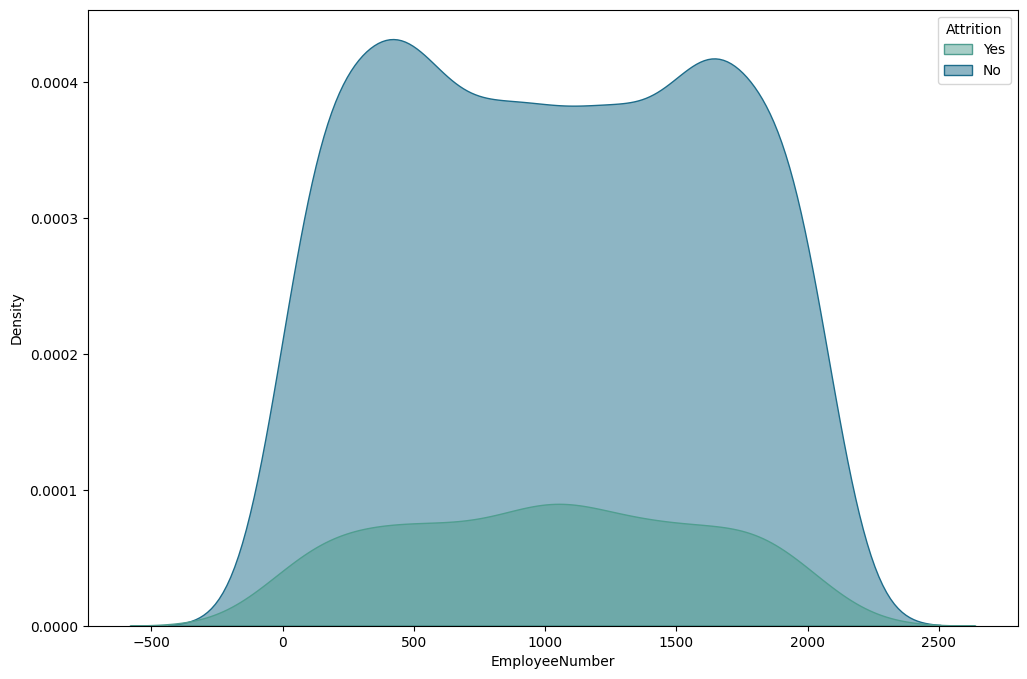

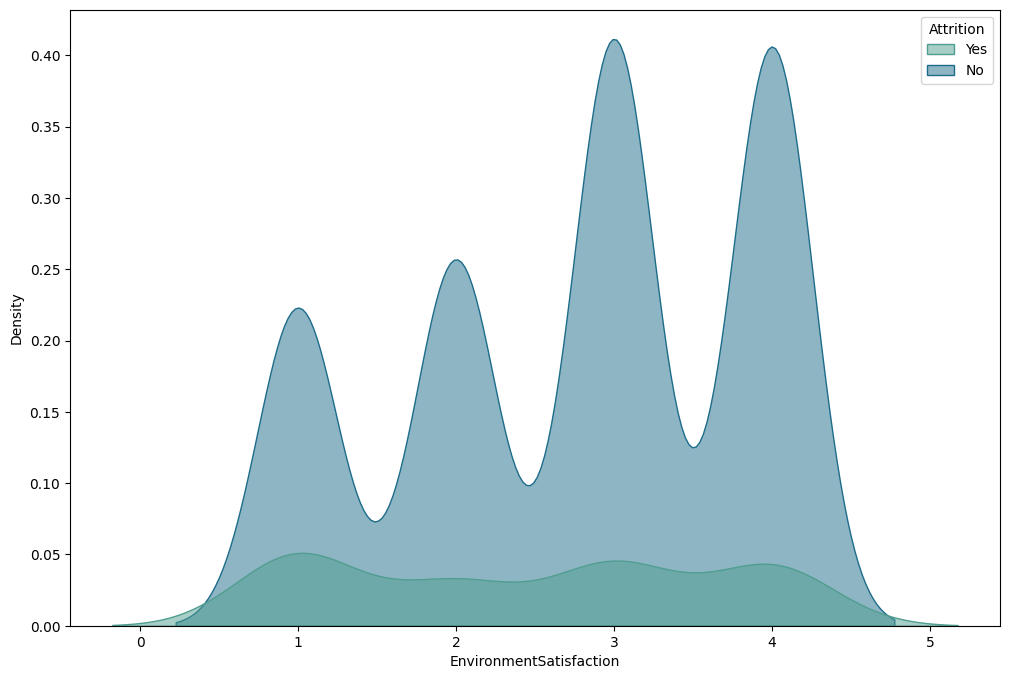

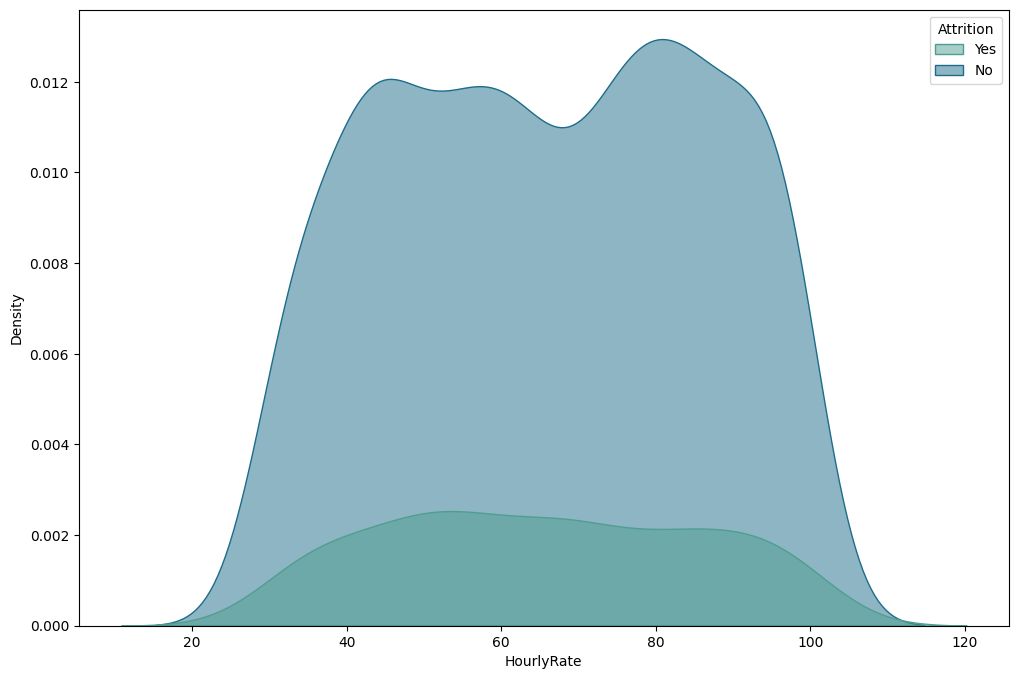

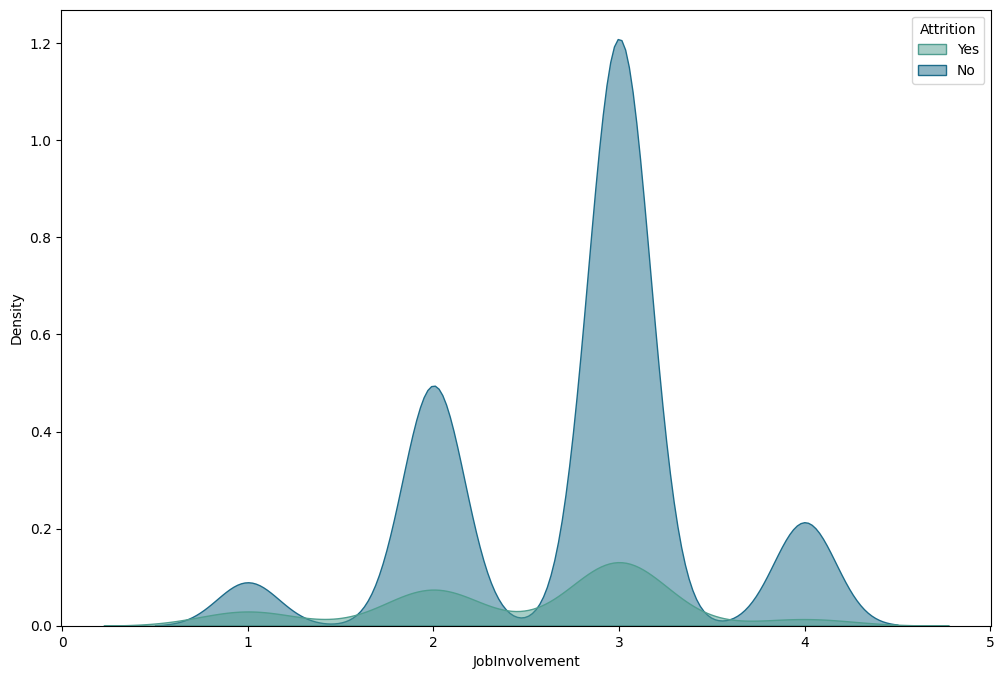

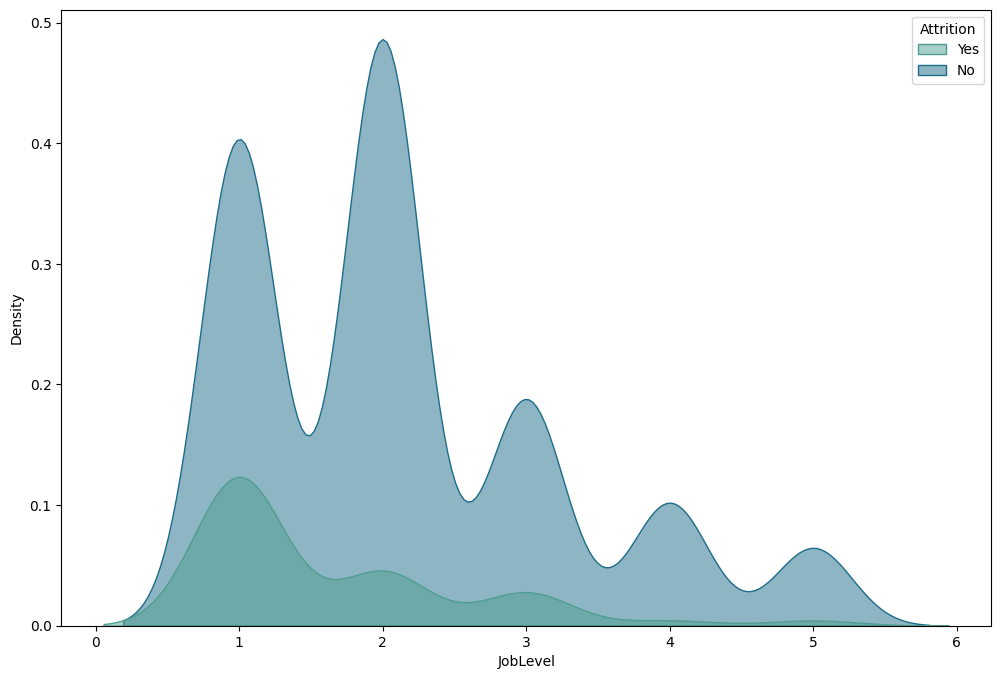

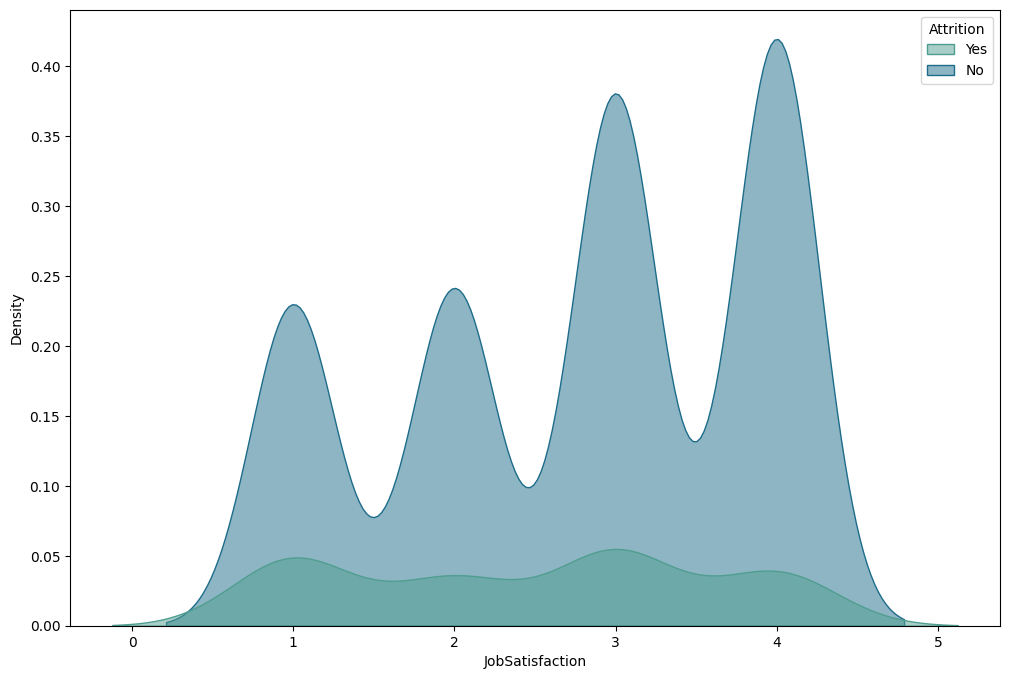

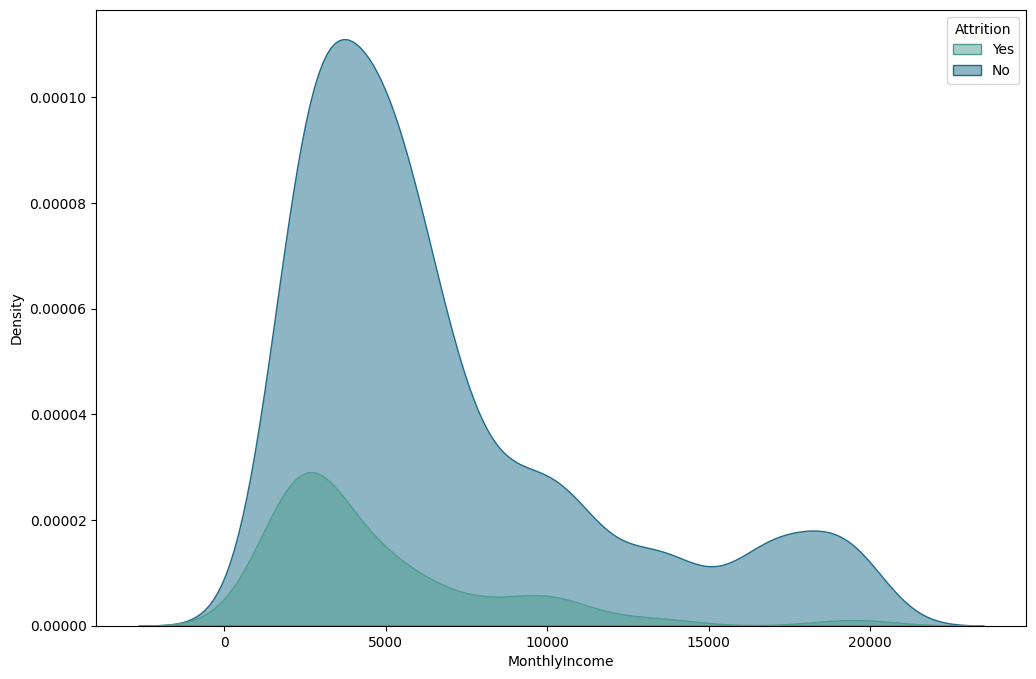

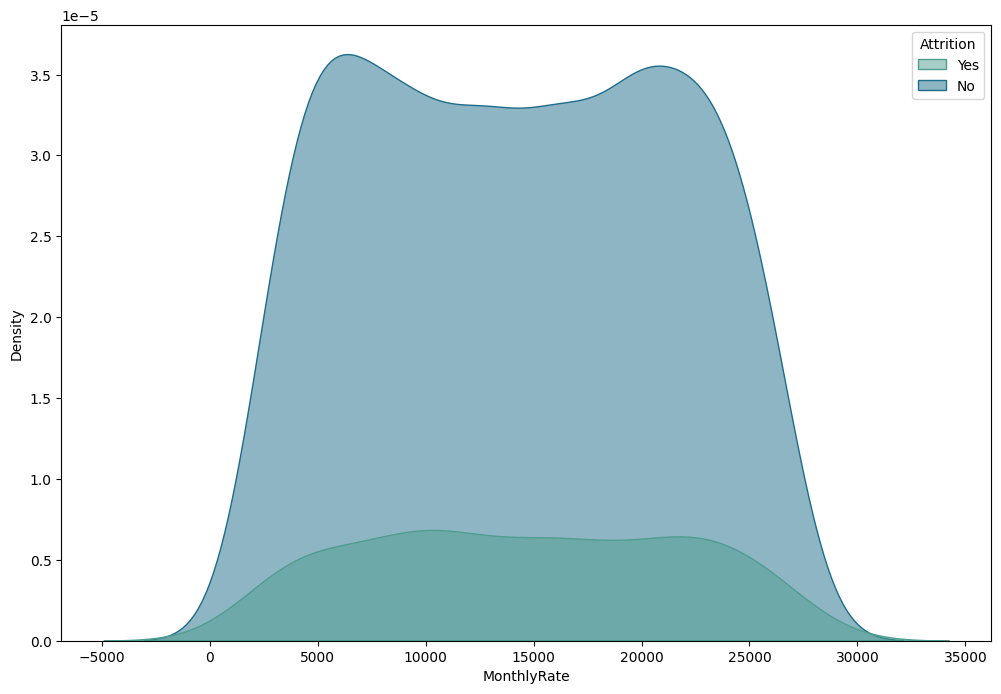

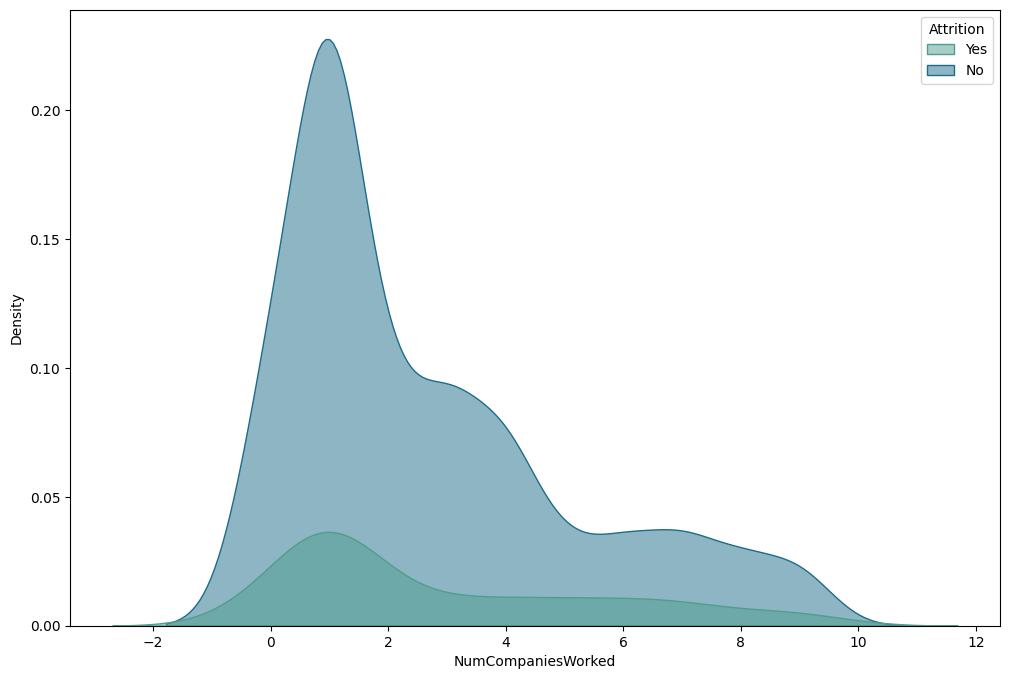

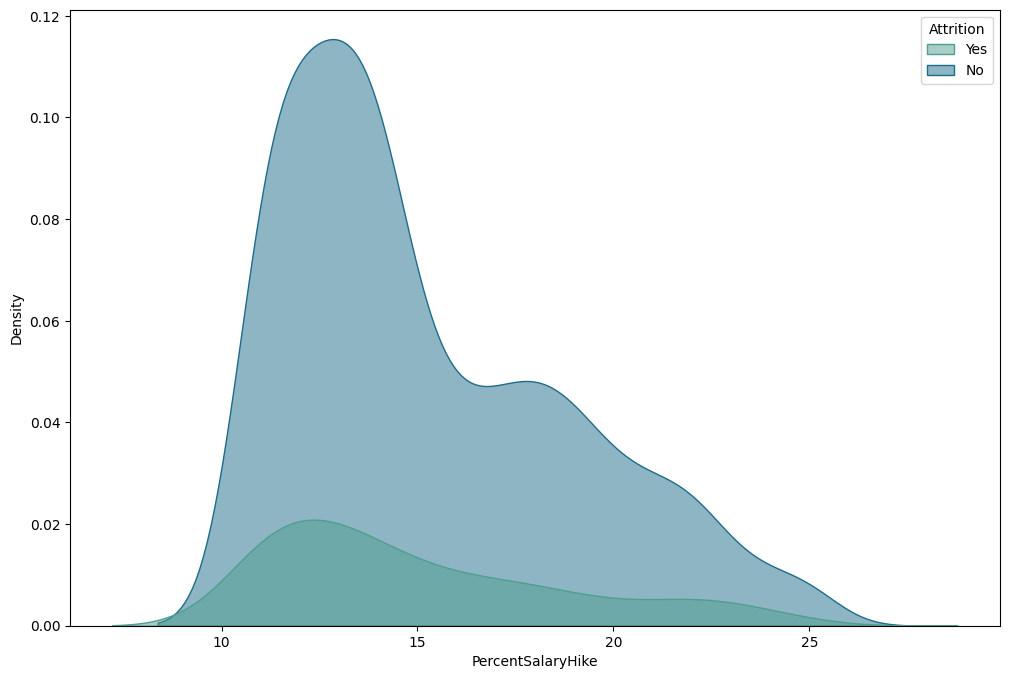

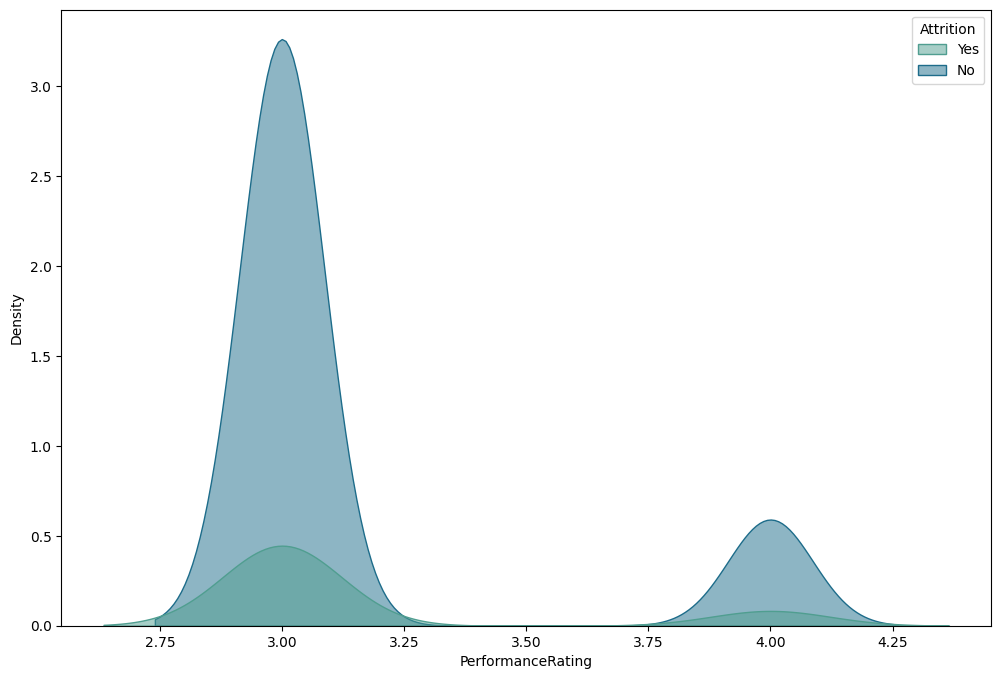

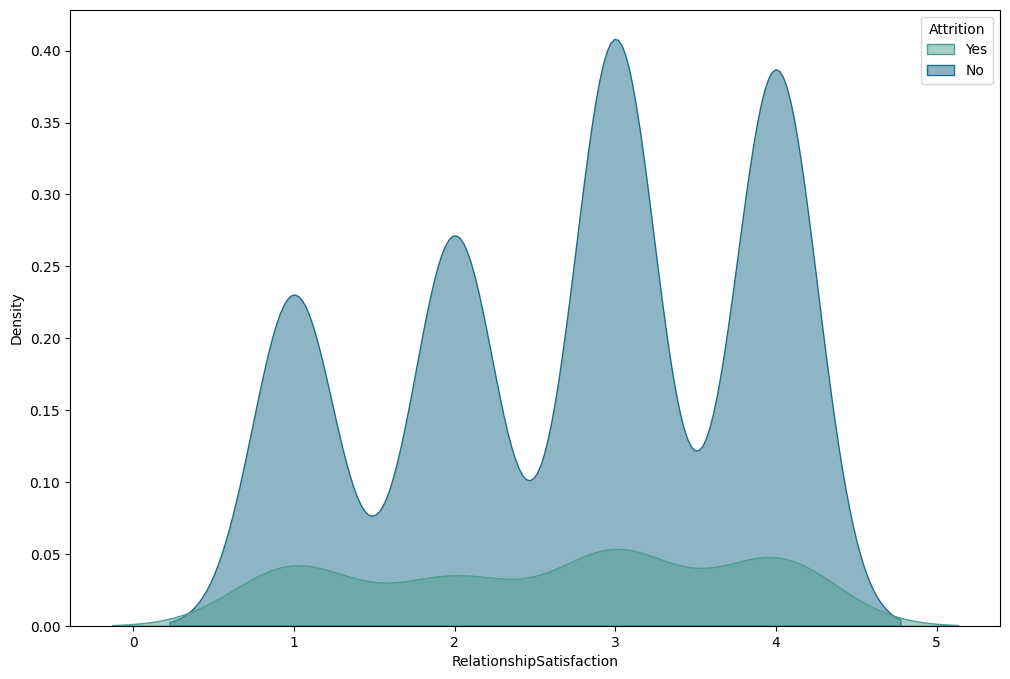

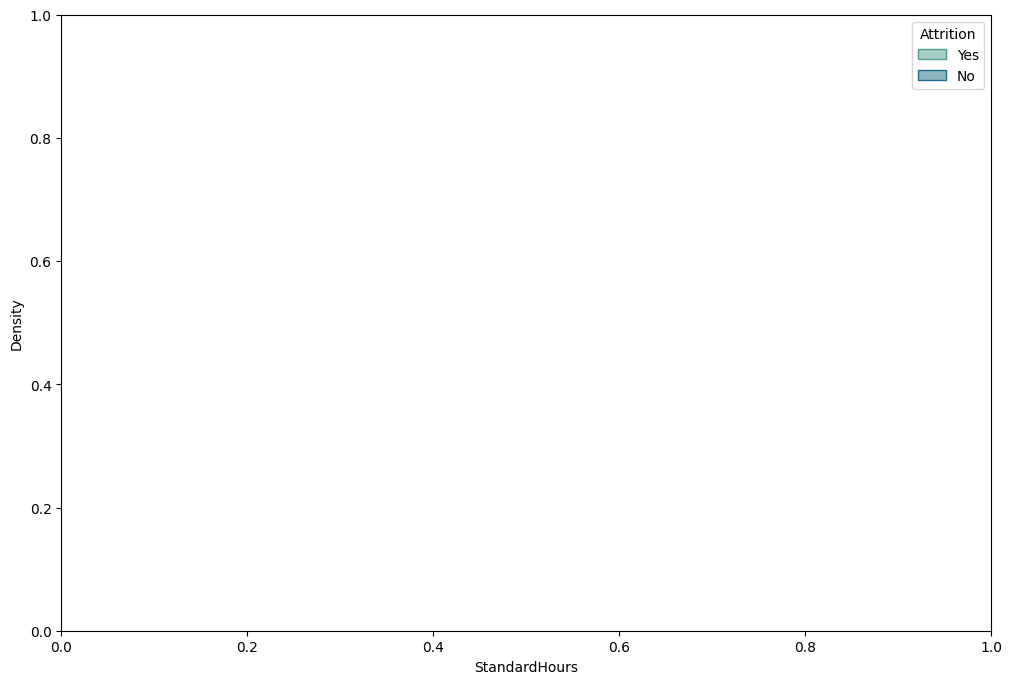

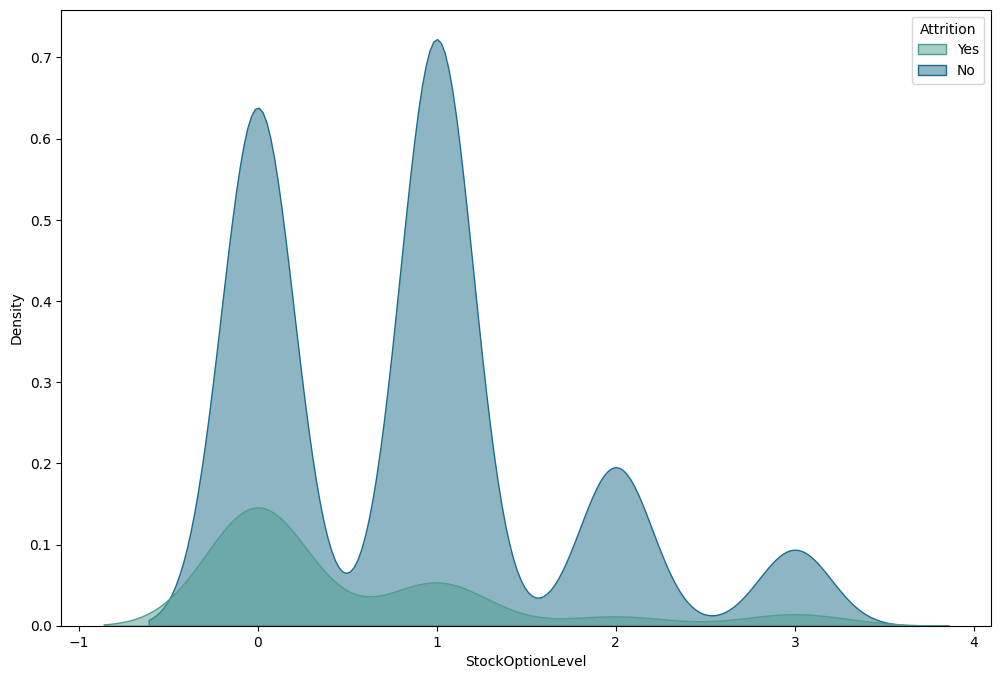

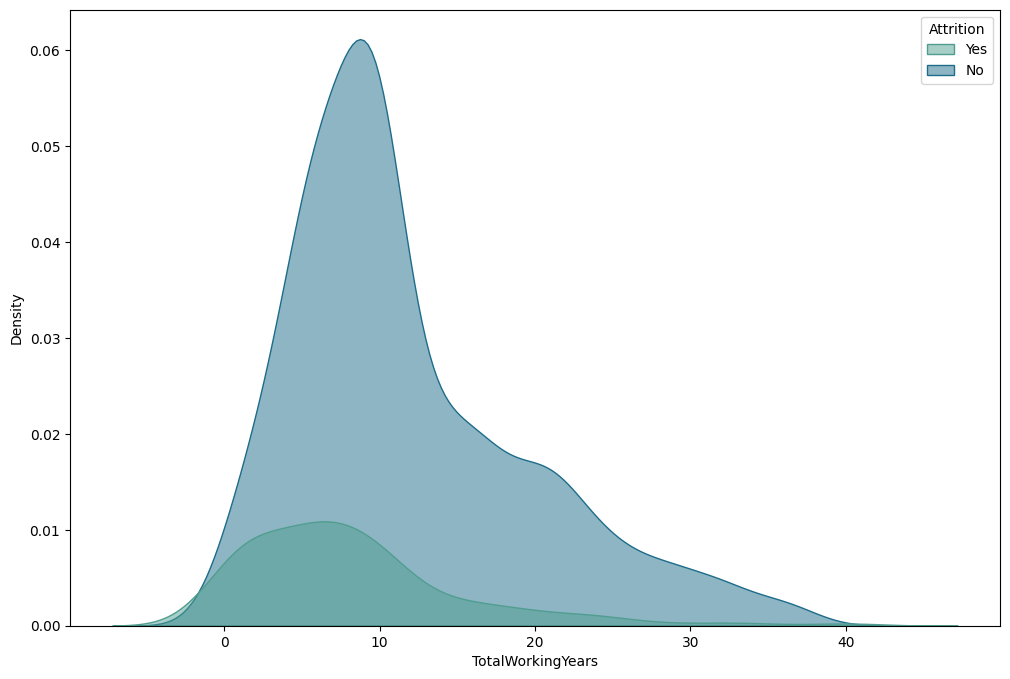

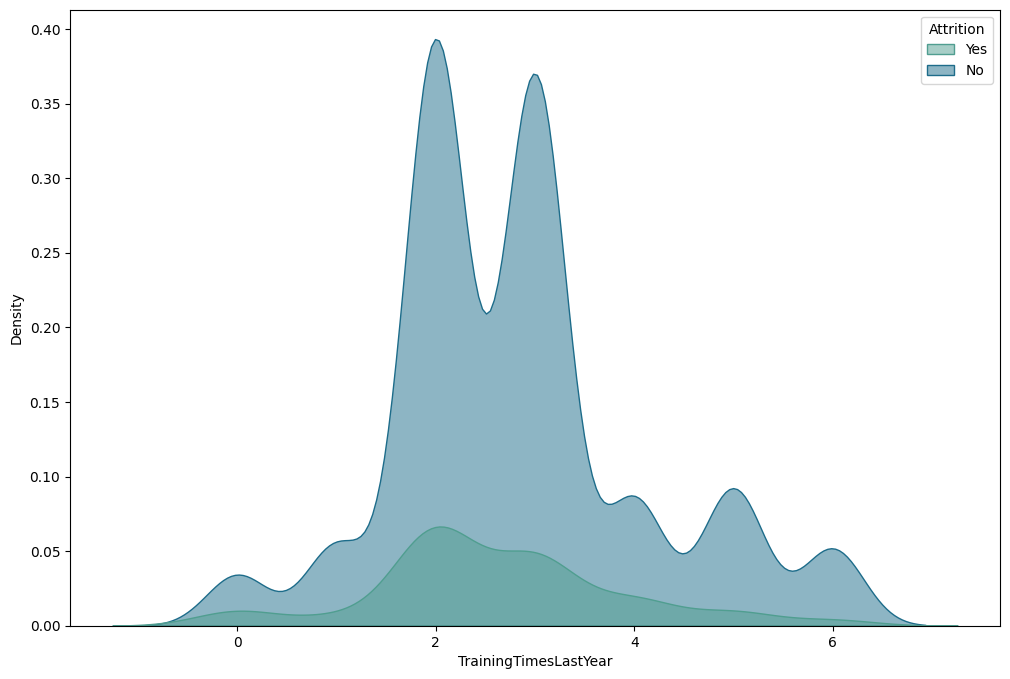

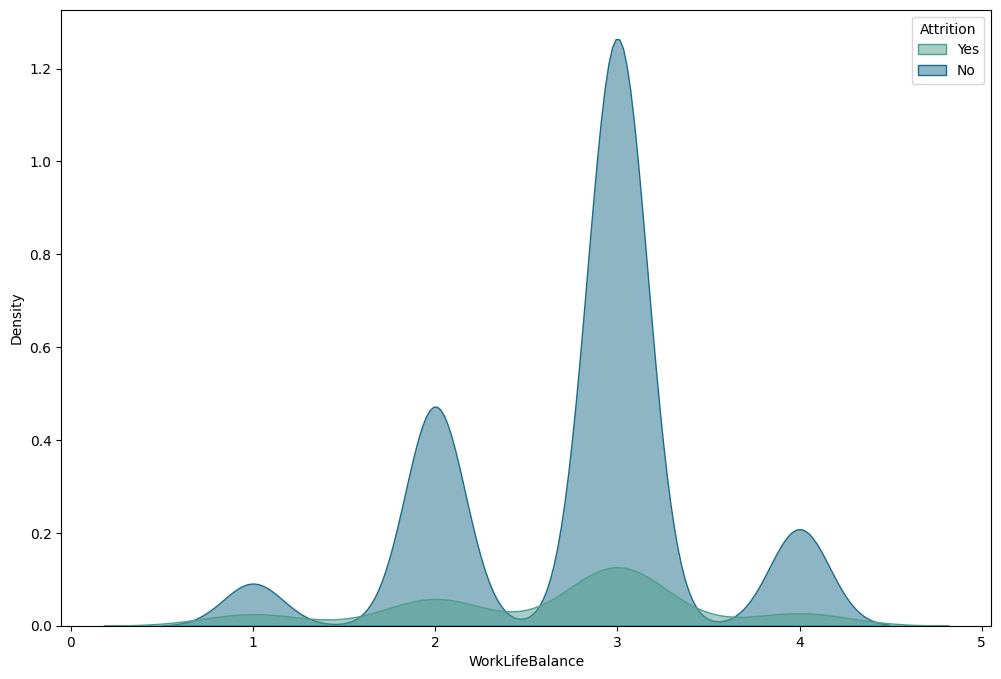

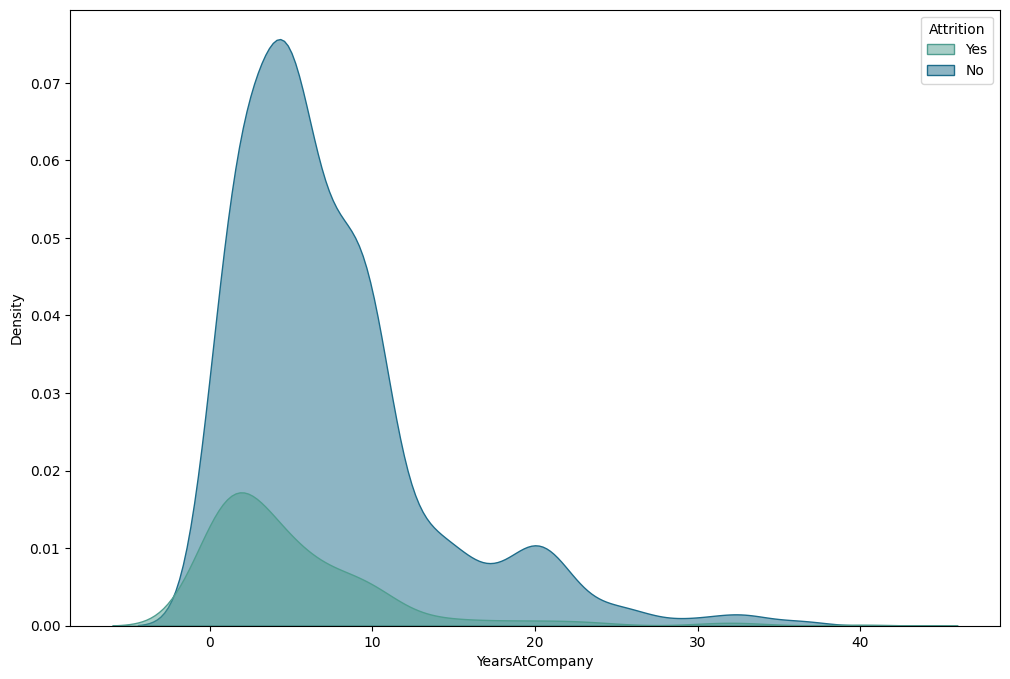

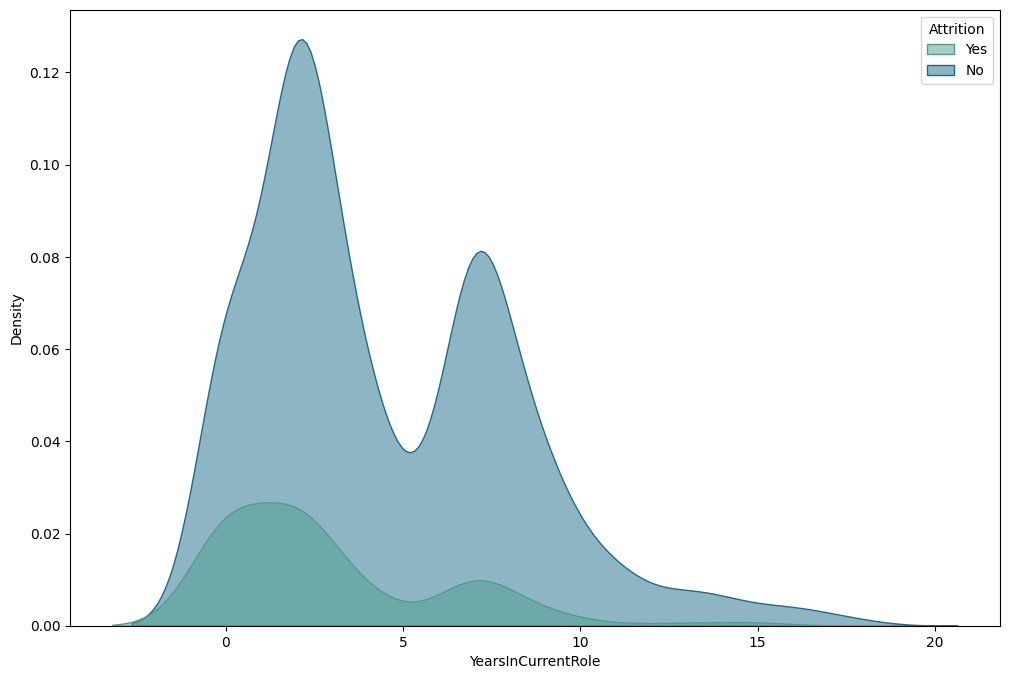

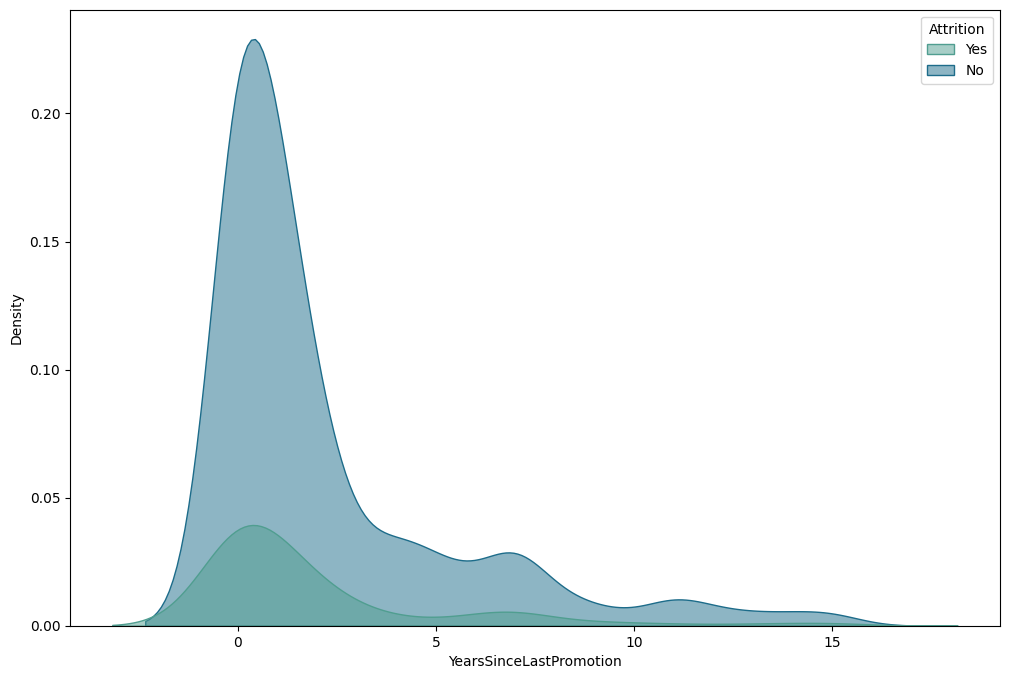

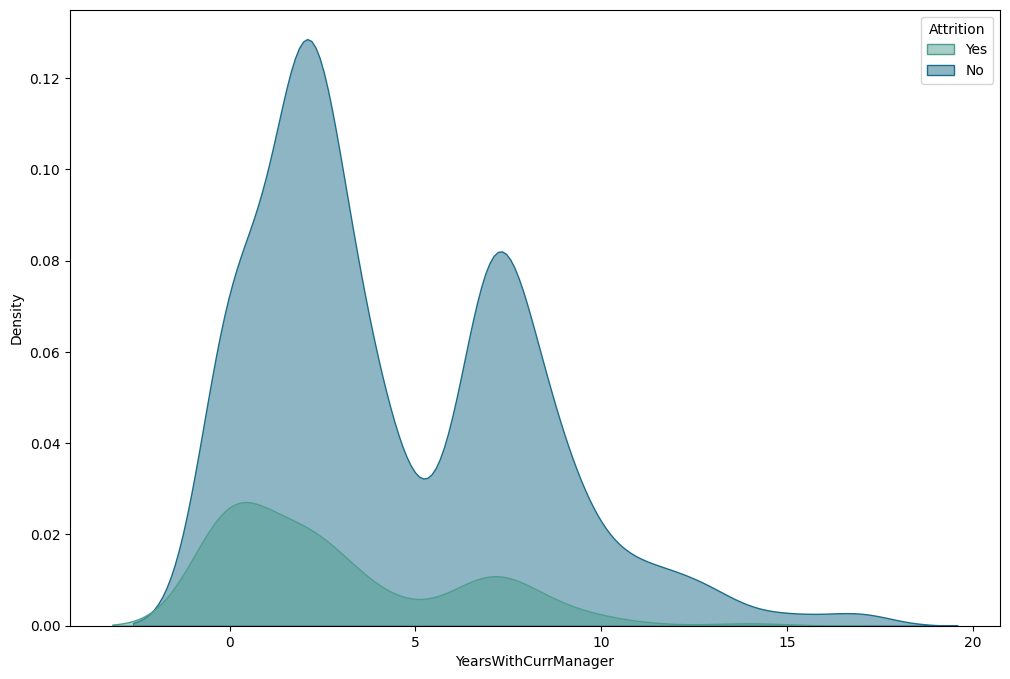

In [206]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=project_data, x=column, hue="Attrition", fill=True, alpha=.5, palette="crest")
    plt.show()

## Correlation Analysis

<Axes: >

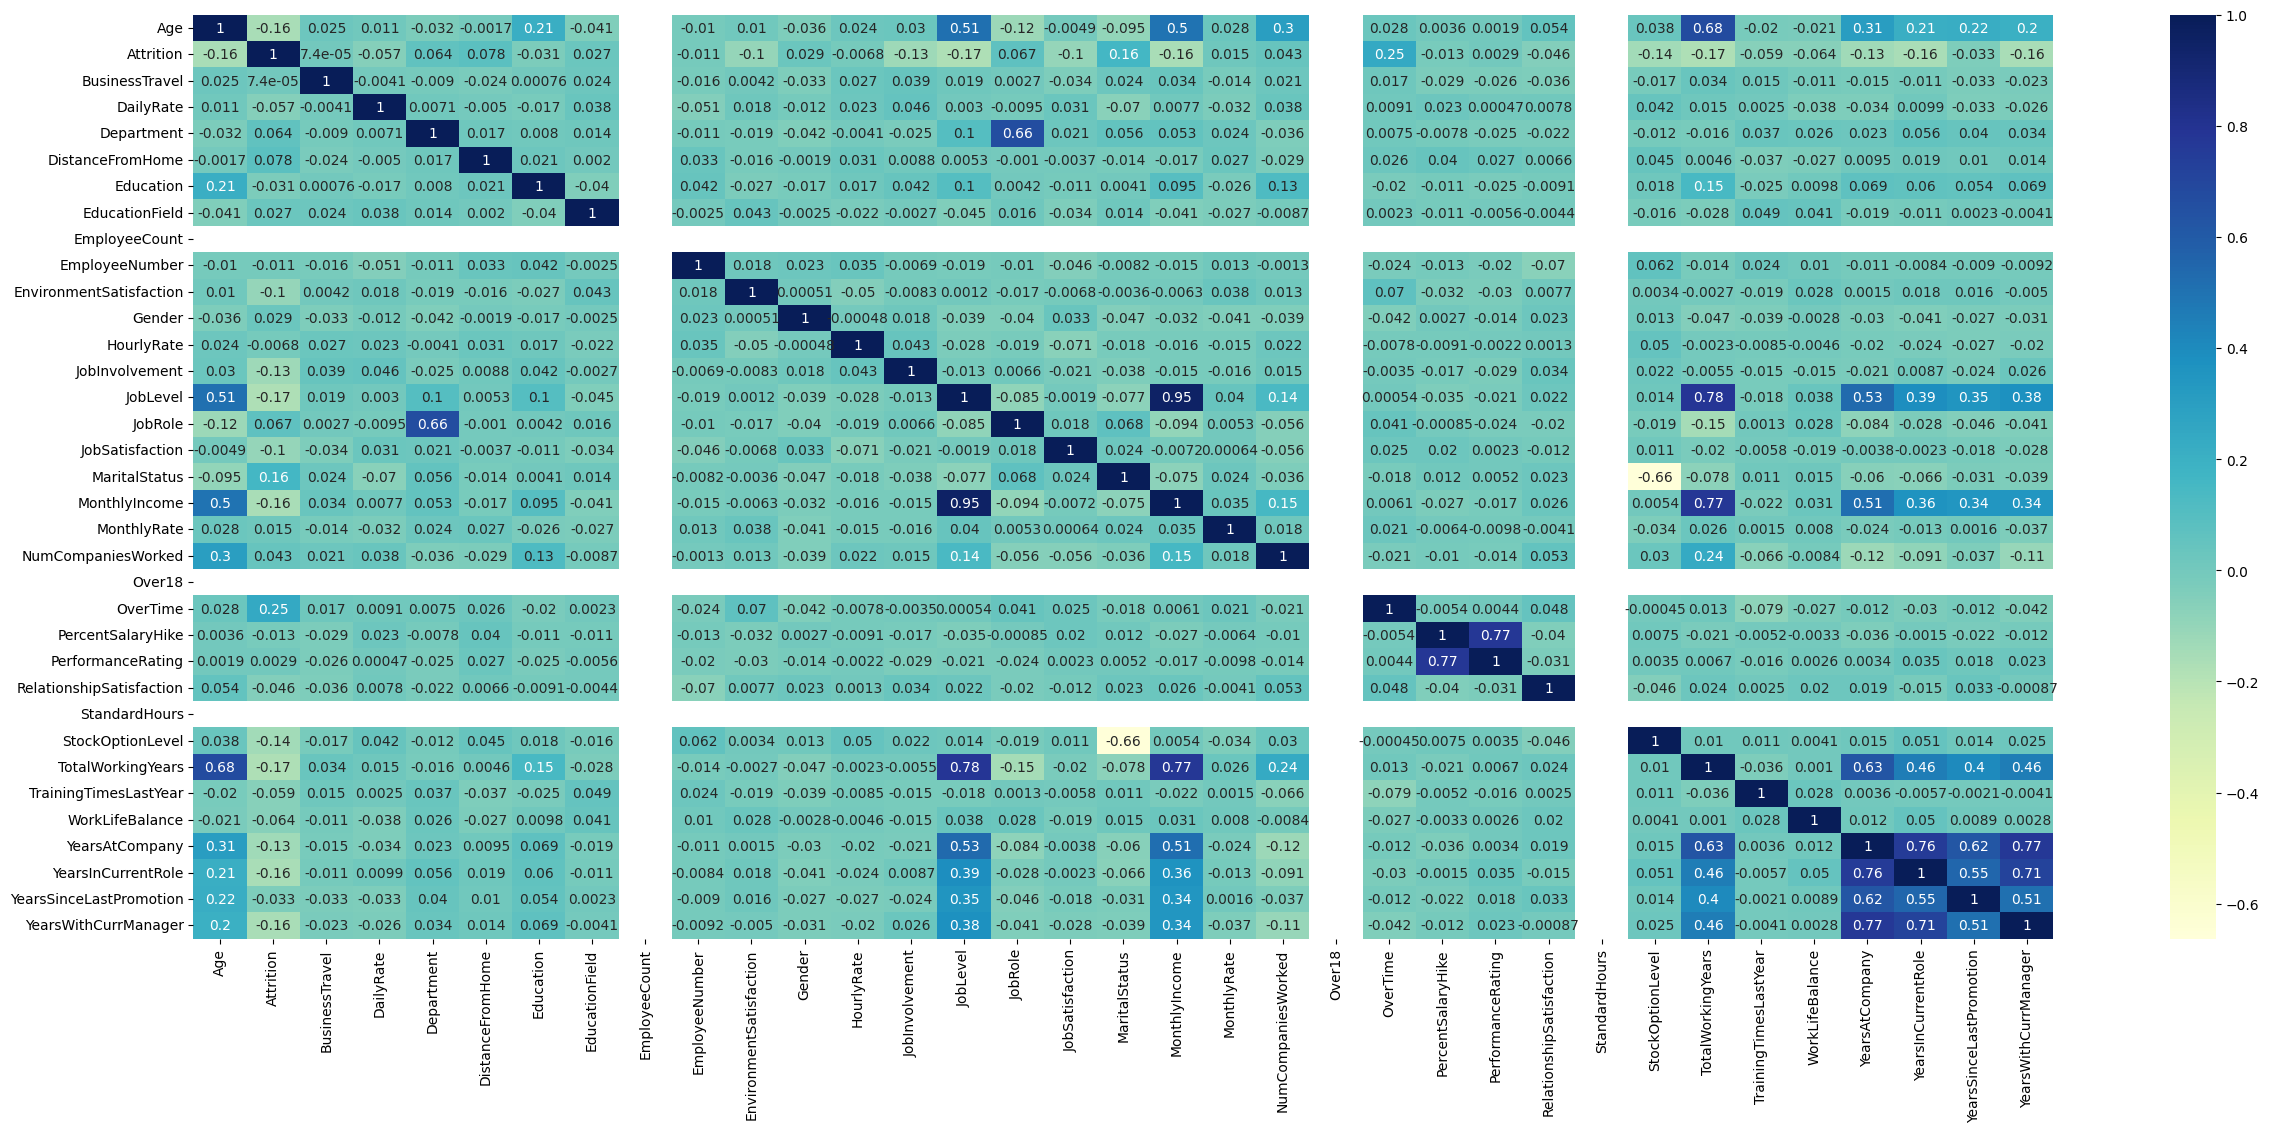

In [207]:
df1 = project_data.copy()

encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = encoder.fit_transform(df1[column])

plt.figure(figsize=(30,12))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Data Preprocessing and Pipelining

In [208]:
X_train=project_data.drop(columns=["Attrition"])
y_train=project_data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [209]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', X_test.shape)

print('Train dataset rows: ', len(X_train))
print('Test dataset rows: ', len(X_test))

Train dataset shape: (1029, 34)
Test dataset shape (441, 34)
Train dataset rows:  1029
Test dataset rows:  441


In [210]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************************************************************************************************
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [211]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRat...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])

## Generic Methods for Model Preparation & Metric Evaliation

In [212]:
def prepare_model_for_ml(name, algorithm):
    
    # model = Pipeline(steps=[
    #     ('processing', processing),  # Assuming you have defined preprocessing steps
    #     ('pca', TruncatedSVD(n_components=3, random_state=12))
    # ])

    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    
    # Save
    filename = "Employee Analysis Attrition Report - "+ name +'.pkl'
    print(filename)
    # with open('C:/Users/saray/Documents/FYP Code Workspace/model/1. Employee Analysis Attrition Report', 'wb') as f:
    pickle.dump(model, open(filename, 'wb'))

    return model

In [213]:
def prepare_model_for_dl(name, algorithm):
    
    model = Pipeline(steps=[
        ('processing', processing),  # Assuming you have defined preprocessing steps
        ('pca', TruncatedSVD(n_components=3, random_state=12))
    ])
    
    # Save
    filename = "Employee Analysis Attrition Report - "+ name +'.pkl'
    print(filename)
    # with open('C:/Users/saray/Documents/FYP Code Workspace/model/1. Employee Analysis Attrition Report', 'wb') as f:
    pickle.dump(model, open(filename, 'wb'))

    return model

In [214]:
# Row 1100 - No
input_data1 = {
    "Age": [40],
    "BusinessTravel": ['Non-Travel'],
    "DailyRate": [1142],
    "Department": ['Research & Development'],
    "DistanceFromHome": [8],
    "Education": [2],
    "EducationField": ['Life Sciences'],
    "EmployeeCount": [1],
    "EmployeeNumber": [1552],
    "EnvironmentSatisfaction": [4],
    "Gender": ['Male'],
    "HourlyRate": [72],
    "JobInvolvement": [3],
    "JobLevel": [2],
    "JobRole": ['Healthcare Representative'],
    "JobSatisfaction": [4],
    "MaritalStatus": ['Divorced'],
    "MonthlyIncome": [4069],
    "MonthlyRate": [8841],
    "NumCompaniesWorked": [3],
    "Over18": ['Y'],
    "OverTime": ['Yes'],
    "PercentSalaryHike": [18],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [3],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [8],
    "TrainingTimesLastYear": [2],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [2],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [2],
    "YearsWithCurrManager": [2]
}

# Row 999 - Yes
input_data2 = {
    "Age": [27],
    "BusinessTravel": ['Travel_Rarely'],
    "DailyRate": [135],
    "Department": ['Research & Development'],
    "DistanceFromHome": [17],
    "Education": [4],
    "EducationField": ['Life Sciences'],
    "EmployeeCount": [1],
    "EmployeeNumber": [1405],
    "EnvironmentSatisfaction": [4],
    "Gender": ['Female'],
    "HourlyRate": [51],
    "JobInvolvement": [3],
    "JobLevel": [2],
    "JobRole": ['Research Scientist'],
    "JobSatisfaction": [3],
    "MaritalStatus": ['Single'],
    "MonthlyIncome": [2394],
    "MonthlyRate": [25681],
    "NumCompaniesWorked": [1],
    "Over18": ['Y'],
    "OverTime": ['Yes'],
    "PercentSalaryHike": [13],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [4],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [8],
    "TrainingTimesLastYear": [2],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [8],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [7],
    "YearsWithCurrManager": [7]
}

# Row 23 - Yes
input_data3 = {
    "Age": [36],
    "BusinessTravel": ['Travel_Rarely'],
    "DailyRate": [1218],
    "Department": ['Sales'],
    "DistanceFromHome": [9],
    "Education": [4],
    "EducationField": ['Life Sciences'],
    "EmployeeCount": [1],
    "EmployeeNumber": [27],
    "EnvironmentSatisfaction": [3],
    "Gender": ['Male'],
    "HourlyRate": [82],
    "JobInvolvement": [2],
    "JobLevel": [1],
    "JobRole": ['Sales Representative'],
    "JobSatisfaction": [1],
    "MaritalStatus": ['Single'],
    "MonthlyIncome": [3407],
    "MonthlyRate": [6986],
    "NumCompaniesWorked": [7],
    "Over18": ['Y'],
    "OverTime": ['No'],
    "PercentSalaryHike": [23],
    "PerformanceRating": [4],
    "RelationshipSatisfaction": [2],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [10],
    "TrainingTimesLastYear": [4],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [5],
    "YearsInCurrentRole": [3],
    "YearsSinceLastPromotion": [0],
    "YearsWithCurrManager": [3]
}

# Row 53 - Yes
input_data4 = {
    "Age": [28],
    "BusinessTravel": ['Travel_Rarely'],
    "DailyRate": [1434],
    "Department": ['Research & Development'],
    "DistanceFromHome": [5],
    "Education": [4],
    "EducationField": ['Technical Degree'],
    "EmployeeCount": [1],
    "EmployeeNumber": [65],
    "EnvironmentSatisfaction": [3],
    "Gender": ['Male'],
    "HourlyRate": [50],
    "JobInvolvement": [3],
    "JobLevel": [1],
    "JobRole": ['Laboratory Technician'],
    "JobSatisfaction": [3],
    "MaritalStatus": ['Single'],
    "MonthlyIncome": [3441],
    "MonthlyRate": [11179],
    "NumCompaniesWorked": [1],
    "Over18": ['Y'],
    "OverTime": ['Yes'],
    "PercentSalaryHike": [13],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [3],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [2],
    "TrainingTimesLastYear": [3],
    "WorkLifeBalance": [2],
    "YearsAtCompany": [2],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [2],
    "YearsWithCurrManager": [2]
}

input_data_df1 = pd.DataFrame(input_data1)
input_data_df2 = pd.DataFrame(input_data2)
input_data_df3 = pd.DataFrame(input_data3)
input_data_df4 = pd.DataFrame(input_data4)

input_data = [input_data_df1, input_data_df2, input_data_df3, input_data_df4]

In [215]:
def plot_confusion_matrix(cm, classes, model_name, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    print(model_name)
    plt.show()

In [216]:
def prepare_confusion_matrix(algo, models, X_test, y_test):
    plt.figure(figsize=(4, 3))
    plt.title(f'Confusion Matrix for {algo}')
    
    for model in models:
        if hasattr(model, "predict_proba"):
            y_pred = model.predict_proba(X_test)[:, 1] > 0.5
        else:
            y_pred = model.predict(X_test)

        # Adjust the threshold for binary classification
        y_pred_binary = (y_pred > 0.5).astype(int)

        
        # test_zeros = np.count_nonzero(y_test == 0)
        # test_ones = np.count_nonzero(y_test == 1)
        
        # print("Number of 0 values in y_test_encoded:", test_zeros)
        # print("Number of 1 values in y_test_encoded:", test_ones)

        # pred_zeros = np.count_nonzero(y_pred_binary == 0)
        # pred_ones = np.count_nonzero(y_pred_binary == 1)
        
        # print("Number of 0 values in y_pred_binary:", pred_zeros)
        # print("Number of 1 values in y_pred_binary:", pred_ones)
        
        # # Print the shapes of y_test_encoded and y_pred to check if they match
        # print("Shape of y_test_encoded:", y_test_encoded.shape)
        # # print("Shape of y_pred:", y_pred.shape)
        
        # # Print the unique values in y_test_encoded to check for any unexpected labels
        # print("Unique values in y_test_encoded:", np.unique(y_test_encoded))

        # print("Shape of y_pred:", y_pred_binary.shape)
        
        # # Print the unique values in y_pred to check for any unexpected predictions
        # print("Unique values in y_pred:", np.unique(y_pred_binary))

        cm = confusion_matrix(y_test, y_pred_binary)

        # print(cm)
        
        # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
        #             xticklabels=['Predicted Negative', 'Predicted Positive'],
        #             yticklabels=['Actual Negative', 'Actual Positive'],
        #             square=True)


        plot_confusion_matrix(cm, classes=['Negative', 'Positive'], model_name=f'{algo}')

        # plt.xlabel('Predicted label')
        # plt.ylabel('True label')
        # plt.show()
        

In [217]:
# def prepare_classification_report(algo, model):
#     print(algo+' Report :')
# #     pred = model.predict(X_test)
# #     print(type(input_data_df))
#     pred_testrow1 = model.predict(input_data_df1)
#     pred_testrow2 = model.predict(input_data_df2)
#     pred_testrow3 = model.predict(input_data_df3)
#     pred_testrow4 = model.predict(input_data_df4)

# #     print(classification_report(y_test, pred))
#     print("My predictions: ", pred_testrow1,", ", pred_testrow2,", ", pred_testrow3,", ", pred_testrow4)

In [218]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboost classifier', GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model_for_ml(tup[0],tup[1])
#     model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
#     trained_models.append((tup[0],model))

    # model = Pipeline(steps=[
    #     ('processing', processing),  # Assuming you have defined preprocessing steps
    #     ('pca', TruncatedSVD(n_components=3, random_state=12))
    # ])
    

Employee Analysis Attrition Report - bagging classifier.pkl
Employee Analysis Attrition Report - KNN classifier.pkl
Employee Analysis Attrition Report - Random Forest calssifier.pkl
Employee Analysis Attrition Report - Adaboost classifier.pkl
Employee Analysis Attrition Report - Gradientboost classifier.pkl
Employee Analysis Attrition Report - MLP.pkl


In [219]:
def prepare_roc_curve(algo, models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for model in models:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]  # Probability of positive class
        else:
            y_score = model.predict(X_test)  # Use predict for neural network models
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{algo} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {algo}')
    plt.legend(loc='lower right')
    plt.show()

## Model Preparation

In [220]:
# Changes - uncommented these 2 lines
# trained_models = []
# model_and_score = {}

In [221]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1029, 34)
Shape of y_train: (1029,)
Shape of X_test: (441, 34)
Shape of y_test: (441,)


In [222]:
# Changes - Added this cell

# FNN Preprocessing

# algorithms = [('FNN', 'FNN'), 
#               ('W&D', 'W&D'), 
#               ('CNN', 'CNN')
#              ] 

# trained_models = []
# model_and_score = {}

# for index, tup in enumerate(algorithms):
#     model = prepare_model(tup[0],tup[1])
#     trained_models.append((tup[0],model))

# model.named_steps['processing'].fit(X_train)

# # Transform the training and testing data using the preprocessing steps
# X_train_transformed = model.named_steps['processing'].transform(X_train)
# X_test_transformed = model.named_steps['processing'].transform(X_test)

# model.named_steps['pca'].fit(X_train_transformed)

# # Perform dimensionality reduction using TruncatedSVD
# X_train_svd = model.named_steps['pca'].transform(X_train_transformed)
# X_test_svd = model.named_steps['pca'].transform(X_test_transformed)

In [223]:
# Function to create a simple DL FNN
# Is there hyperparameter tuning done in this function? Answer is no.
# def create_fnn(input_dim):
#     model = Sequential([
#         Dense(128, activation='relu', input_dim=input_dim),
#         Dropout(0.2),
#         Dense(64, activation='relu'),
#         Dropout(0.2),
#         Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# Function to create a fnn while doing hyperparameter tuning
# Hyperparameter tuning is done
# Explanation: The function is taking in 3 hyperparameters and creating a FNN model with those hyperparameters.
# The function is then compiling the model with an optimizer, loss function and metrics.
# The model is then returned.

def create_fnn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
# Create a KerasClassifier wrapper for use in GridSearchCV
# model = KerasClassifier(build_fn=create_fnn, epochs=10, batch_size=32, verbose=0)

# Define the grid of hyperparameters to search over
# param_grid = {
    # 'optimizer': ['adam', 'rmsprop'],
    # 'dropout_rate': [0.2, 0.3, 0.4]
# }

# Perform grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [224]:
# Train the deep neural network
# def train_fnn(X_train, y_train, X_test, y_test):
#     model = create_fnn(X_train.shape[1])
#     model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
#     # model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))
    
#     # Save
#     filename = "FNN.pkl"
#     print(filename)
#     pickle.dump(model, open(filename,'wb'))

#     # Evaluate model accuracy
#     _, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     print("FNN Accuracy:", accuracy)
    
#     return model


In [225]:
# Function to create and train deep learning ensemble models

# simple average method, voting method, stacking method

# Train the deep learning ensemble model with different aggregation methods
# def train_dl_ensemble(X_train, y_train, X_test, y_test, method='simple_average'):
#     # Train individual deep learning models
#     models = []
#     for i in range(3):  # Train 3 individual models
#         model = create_fnn(X_train.shape[1])
#         model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
#         models.append(model)

#         # Save the individual models using pickle
#         with open(f"model_{method}_{i}.pkl", 'wb') as f:
#             pickle.dump(model, f)
    
#     # Combine predictions of individual models based on the specified method
#     def ensemble_predict(models, X, method):
#         if method == 'simple_average':
#             return (sum(model.predict(X) for model in models) / len(models)).round().astype(int)
#         elif method == 'voting':
#             predictions = np.array([model.predict(X) for model in models])
#             return np.round(np.mean(predictions, axis=0)).astype(int)
#         elif method == 'stacking':
#             predictions = np.array([model.predict(X) for model in models])
#             meta_X = np.concatenate(predictions, axis=1)
#             meta_model = create_deep_neural_network(meta_X.shape[1])
#             meta_model.fit(meta_X, y_test, epochs=10, batch_size=32, validation_split=0.2)
#             return np.round(meta_model.predict(meta_X)).astype(int)
#         else:
#             raise ValueError("Invalid ensemble method provided.")
    
#     # Evaluate ensemble performance
#     ensemble_predictions = ensemble_predict(models, X_test, method)
#     ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
#     print(f"Ensemble Accuracy ({method}):", ensemble_accuracy)
#     model_and_score[f'DL Ensemble ({method})'] = f"{ensemble_accuracy*100:.2f}%"
#     trained_models.append((f'DL Ensemble ({method})', models))


#     # Save the ensemble method details
#     ensemble_details = {
#         'method': method,
#         'models': models
#     }
#     with open(f"ensemble_model_{method}.pkl", 'wb') as f:
#         pickle.dump(ensemble_details, f)
        
#     return models

In [226]:
# Define the wide component
def create_wide_model(input_dim):
    model = Sequential([
        Dense(1, activation='sigmoid', input_dim=input_dim)  # Add a single output neuron for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_wide_and_deep_model(input_dim):
    # Define input layers for wide and deep components
    wide_inputs = Input(shape=(input_dim,))
    deep_inputs = Input(shape=(input_dim,))

    # Define wide component (simple dense layer)
    wide_layer = Dense(128, activation='relu')(wide_inputs)

    # Define deep component (deep neural network)
    deep_layer = Dense(64, activation='relu')(deep_inputs)
    deep_layer = Dense(32, activation='relu')(deep_layer)

    # Concatenate wide and deep components
    merged_layer = concatenate([wide_layer, deep_layer])

    # Output layer
    output = Dense(1, activation='sigmoid')(merged_layer)

    # Create model
    model = Model(inputs=[wide_inputs, deep_inputs], outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Train the wide and deep model
# def train_wide_and_deep_model(X_train, y_train, X_test, y_test):
#     wide_and_deep_model = create_wide_and_deep_model(X_train.shape[1])
#     wide_and_deep_model.fit([X_train, X_train], y_train, epochs=1, batch_size=32, validation_data=([X_test, X_test], y_test))
    
#     # Save the model
#     filename = "WideAndDeep.pkl"
#     print(filename)
#     pickle.dump(wide_and_deep_model, open(filename, 'wb'))

#     # Evaluate model accuracy
#     _, accuracy = wide_and_deep_model.evaluate([X_test, X_test], y_test, verbose=0)
#     print("Wide & Deep Model Accuracy:", accuracy)
    
#     return wide_and_deep_model

In [227]:
# FNN Preprocessing

# algorithms = [('FNN', 'FNN'), 
#               ('W&D', 'W&D'), 
#               ('CNN', 'CNN')
#              ] 

# trained_models = []
# model_and_score = {}

# for index, tup in enumerate(algorithms):
#     model = prepare_model(tup[0],tup[1])
#     trained_models.append((tup[0],model))

model.named_steps['processing'].fit(X_train)

# Transform the training and testing data using the preprocessing steps
X_train_transformed = model.named_steps['processing'].transform(X_train)
X_test_transformed = model.named_steps['processing'].transform(X_test)

model.named_steps['pca'].fit(X_train_transformed)

# Perform dimensionality reduction using TruncatedSVD
X_train_svd = model.named_steps['pca'].transform(X_train_transformed)
X_test_svd = model.named_steps['pca'].transform(X_test_transformed)

In [228]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit label encoder and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [229]:
# Train the Wide & Deep Model
# wide_and_deep_model = train_wide_and_deep_model(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded)

In [230]:
def create_cnn_model(input_shape):
    print(input_shape)
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    print(input_shape)
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [231]:
# def train_cnn_model(X_train, y_train, X_test, y_test):

#     X_train_reshaped = np.expand_dims(X_train_svd, axis=2)
#     X_test_reshaped = np.expand_dims(X_test_svd, axis=2)

#     cnn_model = create_cnn_model(X_train_reshaped.shape[1:])    
#     cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))
    
#     # Save the model
#     filename = "CNN_model.pkl"
#     print(filename)
#     cnn_model.save(filename)
    
#     # Evaluate model accuracy
#     _, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
#     print("CNN Model Accuracy:", accuracy)
    
#     return cnn_model

In [232]:
X_train_reshaped = np.expand_dims(X_train_svd, axis=2)
X_test_reshaped = np.expand_dims(X_test_svd, axis=2)

# Train the CNN Model
# cnn_model = train_cnn_model(X_train_reshaped, y_train_encoded, X_test_reshaped, y_test_encoded)

In [233]:
# def train_dl_ensemble(X_train, y_train, X_test, y_test, method='simple_average'):
#     print("-------- FNN ----------")
#     input_dim = X_train.shape[1]
#     # Train individual deep learning models
#     fnn_model = create_fnn(X_train.shape[1])
#     fnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
#     # FNN
#     fnn_accuracy = fnn_model.evaluate(X_test, y_test, verbose=0)[1]
#     print("FNN Model Accuracy:", fnn_accuracy)

#     print("-------- Wide and Deep ----------")
#     wide_and_deep_model = create_wide_and_deep_model(input_dim)  # Assuming you have a function to create Wide & Deep model
#     # wide_and_deep_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
#     wide_and_deep_model.fit([X_train, X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test, X_test], y_test))  # Modified to use both inputs
#     wide_and_deep_accuracy = wide_and_deep_model.evaluate([X_test, X_test], y_test, verbose=0)[1]
#     print("Wide & Deep Model Accuracy:", wide_and_deep_accuracy)

#     # CNN Preprocessing
#     X_train_reshaped = np.expand_dims(X_train_svd, axis=2)
#     X_test_reshaped = np.expand_dims(X_test_svd, axis=2)

#     print("-------- CNN ----------")

#     cnn_model = create_cnn_model(X_train_reshaped.shape[1:])    
#     cnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))
#     cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)[1]
#     print("CNN Model Accuracy:", cnn_accuracy)

#     # models = [fnn_model, cnn_model]
#     models = [fnn_model, wide_and_deep_model, cnn_model]

#     def ensemble_predict(models, X, method):
#         predictions = []
        
#         # Iterate through each model
#         for model in models:
#             # Preprocess input data for the current model if necessary
#             if isinstance(model, Sequential):  # Checking if the model is a Keras Sequential model
#                 X_preprocessed = X  # No preprocessing necessary for some models
#             elif isinstance(model, Model):  # Checking if the model is a Keras functional API model
#                 X_preprocessed = (X, X)  # Pass as a tuple for models with two inputs
#             else:
#                 raise ValueError("Invalid model type provided.")
            
#             # Make predictions using the current model and append them to the predictions list
#             predictions.append(model.predict(X_preprocessed))
    
#         # Combine predictions based on the specified method
#         if method == 'simple_average':
#             predictions = np.array(predictions)
#             return np.round(np.mean(predictions, axis=0)).astype(int)
#         elif method == 'voting':
#             predictions = np.array(predictions)
#             return np.round(np.mean(predictions, axis=0)).astype(int)
#         elif method == 'stacking':
#             meta_X = np.concatenate(predictions, axis=1)
#             meta_model = create_fnn(meta_X.shape[1])
#             # meta_model.fit(meta_X, y_test, epochs=10, batch_size=32, validation_split=0.2)
#             meta_model.fit(meta_X, y_train, epochs=100, batch_size=32, validation_split=0.2)  # Train on y_train
#             return np.round(meta_model.predict(meta_X)).astype(int)
#         else:
#             raise ValueError("Invalid ensemble method provided.")

#     # Evaluate ensemble performance
#     ensemble_predictions = ensemble_predict(models, X_test, method)
#     ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
#     print(f"Ensemble Accuracy ({method}):", ensemble_accuracy)

#     # Save the ensemble method details
#     ensemble_details = {
#         'method': method,
#         'models': models
#     }
#     print(type(ensemble_details))
#     with open(f"ensemble_model_{method}.pkl", 'wb') as f:
#         pickle.dump(ensemble_details, f)

#     return models

In [234]:
# Check the shape of the input arrays
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Check the content of the input arrays
print("Sample of X_train:")
print(X_train[:5])  # Print the first 5 rows of X_train to verify its content
print("Sample of y_train:")
print(y_train[:5])  # Print the first 5 elements of y_train to verify its content
print("Sample of X_test:")
print(X_test[:5])   # Print the first 5 rows of X_test to verify its content
print("Sample of y_test:")
print(y_test[:5])   # Print the first 5 elements of y_test to verify its content


Shape of X_train: (1029, 34)
Shape of y_train: (1029,)
Shape of X_test: (441, 34)
Shape of y_test: (441,)
Sample of X_train:
      Age     BusinessTravel  DailyRate              Department  \
971    51      Travel_Rarely       1405  Research & Development   
376    51      Travel_Rarely       1178                   Sales   
580    35      Travel_Rarely        384                   Sales   
1100   35      Travel_Rarely       1402                   Sales   
443    22  Travel_Frequently       1368  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
971                 11          2  Technical Degree              1   
376                 14          2     Life Sciences              1   
580                  8          4     Life Sciences              1   
1100                28          4     Life Sciences              1   
443                  4          1  Technical Degree              1   

      EmployeeNumber  EnvironmentSatisfaction  ... 

In [235]:
# train_zeros = np.count_nonzero(y_train_encoded == 0)
# train_ones = np.count_nonzero(y_train_encoded == 1)

# print("Number of 0 values in y_train_encoded:", train_zeros)
# print("Number of 1 values in y_train_encoded:", train_ones)

# test_zeros = np.count_nonzero(y_test_encoded == 0)
# test_ones = np.count_nonzero(y_test_encoded == 1)

# print("Number of 0 values in y_test_encoded:", test_zeros)
# print("Number of 1 values in y_test_encoded:", test_ones)

# Train deep learning models
# dl_model = train_fnn(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded)

# Train deep learning ensemble model
# dl_ensemble_models = train_dl_ensemble(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded)

X_train = X_train_svd
y_train = y_train_encoded
X_test = X_test_svd
y_test = y_test_encoded

# Check the content of the input arrays
print("Sample of X_train:")
print(X_train[:5])  # Print the first 5 rows of X_train to verify its content
print("Sample of y_train:")
print(y_train[:5])  # Print the first 5 elements of y_train to verify its content
print("Sample of X_test:")
print(X_test[:5])   # Print the first 5 rows of X_test to verify its content
print("Sample of y_test:")
print(y_test[:5])   # Print the first 5 elements of y_test to verify its content

# Train FNN
print("-------- FNN ----------")
input_dim = X_train.shape[1]
# Train individual deep learning models
fnn_model = create_fnn(X_train.shape[1])
fnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
fnn_accuracy = fnn_model.evaluate(X_test, y_test, verbose=0)[1]
print("FNN Model Accuracy:", fnn_accuracy)

# Train W&D
print("-------- Wide and Deep ----------")
wide_and_deep_model = create_wide_and_deep_model(input_dim)  # Assuming you have a function to create Wide & Deep model
# wide_and_deep_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
wide_and_deep_model.fit([X_train, X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test, X_test], y_test))  # Modified to use both inputs
wide_and_deep_accuracy = wide_and_deep_model.evaluate([X_test, X_test], y_test, verbose=0)[1]
print("Wide & Deep Model Accuracy:", wide_and_deep_accuracy)

# CNN Preprocessing
X_train_reshaped = np.expand_dims(X_train_svd, axis=2)
X_test_reshaped = np.expand_dims(X_test_svd, axis=2)

print("-------- CNN ----------")
cnn_model = create_cnn_model(X_train_reshaped.shape[1:])    
cnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))
cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)[1]
print("CNN Model Accuracy:", cnn_accuracy)

# models = [fnn_model, cnn_model]
models = [fnn_model, wide_and_deep_model, cnn_model]

def ensemble_predict(models, X, method):
    predictions = []
    
    # Iterate through each model
    for model in models:
        # Preprocess input data for the current model if necessary
        if isinstance(model, Sequential):  # Checking if the model is a Keras Sequential model
            X_preprocessed = X  # No preprocessing necessary for some models
        elif isinstance(model, Model):  # Checking if the model is a Keras functional API model
            X_preprocessed = (X, X)  # Pass as a tuple for models with two inputs
        else:
            raise ValueError("Invalid model type provided.")
        
        # Make predictions using the current model and append them to the predictions list
        predictions.append(model.predict(X_preprocessed))

    # Combine predictions based on the specified method
    if method == 'simple_average':
        predictions = np.array(predictions)
        return np.round(np.mean(predictions, axis=0)).astype(int)
    elif method == 'voting':
        predictions = np.array(predictions)
        class_votes = np.round(np.mean(predictions, axis=0)).astype(int)
        final_prediction = np.where(np.sum(class_votes, axis=1) > predictions.shape[0] / 2, 1, 0)
        return final_prediction
    elif method == 'stacking':
        meta_X = np.concatenate(predictions, axis=1)
        meta_model = create_fnn(meta_X.shape[1])
        meta_model.fit(meta_X, y_train, epochs=100, batch_size=32, validation_split=0.2)  # Train on y_train
        # Save Stacking Ensemble
        meta_model.save("stacking_ensemble_model.h5")
        return np.round(meta_model.predict(meta_X)).astype(int)
    else:
        raise ValueError("Invalid ensemble method provided.")


# # Evaluate ensemble performance
# ensemble_predictions = ensemble_predict(models, X_test, method)
# ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
# print(f"Ensemble Accuracy ({method}):", ensemble_accuracy)

# # Save the ensemble method details
# ensemble_details = {
#     'method': method,
#     'models': models
# }
# print(type(ensemble_details))
# with open(f"ensemble_model_{method}.pkl", 'wb') as f:
#     pickle.dump(ensemble_details, f)

# Define the ensemble methods
ensemble_methods = ['simple_average', 'voting', 'stacking']

# Make predictions using ensemble methods
for method in ensemble_methods:
    print(f"\n-------- Ensemble Method: {method} ----------")
    ensemble_predictions = ensemble_predict(models, X_test, method)
    ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
    print(f"Ensemble Accuracy ({method}): {ensemble_accuracy}")

# Save Base Models
fnn_model.save("fnn_model.h5")
wide_and_deep_model.save("wide_and_deep_model.h5")
cnn_model.save("cnn_model.h5")

# Train deep learning ensemble models with different methods
# print ("-------------------Simple Average Method----------")
# dl_ensemble_models_simple_avg = train_dl_ensemble(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded, method='simple_average')
# print ("----------------------Voting Method---------------------------")
# dl_ensemble_models_voting = train_dl_ensemble(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded, method='voting')
# print ("----------------------Stacking Method--------------------")
# dl_ensemble_models_stacking = train_dl_ensemble(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded, method='stacking')


Sample of X_train:
[[ 4.19344284  1.56946903 -1.31839206]
 [ 4.06123352  1.1534503   2.298418  ]
 [ 4.00480458 -2.067252    2.52948448]
 [ 4.00103953 -1.53451972  2.37644643]
 [ 3.82428873 -2.97148665 -0.99321267]]
Sample of y_train:
[0 0 0 0 1]
Sample of X_test:
[[ 4.56561808 -2.4062069  -0.67715622]
 [ 3.02631511  1.92625306 -1.46985035]
 [ 4.38473043  0.37254891 -0.86241276]
 [ 3.44305621 -0.75815545  2.41947527]
 [ 3.480952    0.49167184  0.94775646]]
Sample of y_test:
[0 0 0 1 0]
-------- FNN ----------

Epoch 1/100


33/33 [==============================] - 1s 7ms/step - loss: 0.4489 - accuracy: 0.8435 - val_loss: 0.4745 - val_accuracy: 0.8005
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8562 - val_loss: 0.4394 - val_accuracy: 0.8005
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8601 - val_loss: 0.4490 - val_accuracy: 0.8005
Epoch 4/100
33/33 [==============================] - 0s 2ms/

## Model Evaluation

In [236]:
print(model_and_score)

{}


In [237]:
# Load trained models from pickle files
dl_ensemble_models = []
with open(f"ensemble_model_simple_average.pkl", 'rb') as f:
    dl_ensemble_models.append(pickle.load(f))

with open(f"ensemble_model_stacking.pkl", 'rb') as f:
    dl_ensemble_models.append(pickle.load(f))

with open(f"ensemble_model_voting.pkl", 'rb') as f:
    dl_ensemble_models.append(pickle.load(f))

In [238]:
# trained_models

dl_ensemble_models

[{'method': 'simple_average',
  'models': [<keras.src.engine.sequential.Sequential at 0x1d5fcfb6cd0>,
   <keras.src.engine.sequential.Sequential at 0x1d58b992e90>]},
 {'method': 'stacking',
  'models': [<keras.src.engine.sequential.Sequential at 0x1d58b9f9790>,
   <keras.src.engine.sequential.Sequential at 0x1d5fb542110>]},
 {'method': 'voting',
  'models': [<keras.src.engine.sequential.Sequential at 0x1d58c59d790>,
   <keras.src.engine.sequential.Sequential at 0x1d583c79f10>]}]

In [239]:
len(X_test_svd)

441

14/14 [==============================] - 0s 930us/step
simple_average


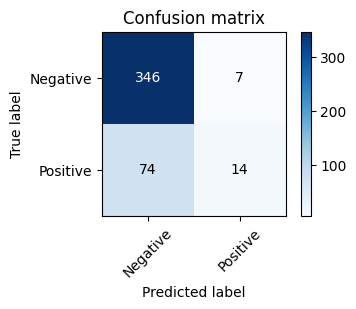

ValueError: in user code:

    File "C:\Users\saray\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\saray\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\saray\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\saray\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\saray\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\saray\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_5" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 3) dtype=float32>]


In [240]:
# Prepare Confusion Matrix

# Ensure y_test is encoded properly
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

for model_info in dl_ensemble_models:
    algo = model_info['method']
    models = model_info['models']
    prepare_confusion_matrix(algo, models, X_test_svd, y_test_encoded)

In [ ]:
# for index, tup in enumerate(trained_models):
#     prepare_classification_report(tup[0], tup[1])
#     print("\n")

In [ ]:
# Prepare ROC curve

# Ensure y_test is encoded properly
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

# Iterate over trained models and prepare ROC curves
for algo, models in trained_models:
    prepare_roc_curve(algo, models, X_test_svd, y_test_encoded)

In [241]:
# Prepare Classification Report

# Transform input data using preprocessing steps
input_data = [input_data_df1, input_data_df2, input_data_df3, input_data_df4]

input_data_transformed = [model.named_steps['processing'].transform(data) for data in input_data]
input_data_svd = [model.named_steps['pca'].transform(data_transformed) for data_transformed in input_data_transformed]

# Define a function to convert probabilities to Yes/No labels
def convert_to_yes_no(predictions):
    return ["Yes" if pred > 0.5 else "No" for pred in predictions]

# Make predictions using the deep learning ensemble models
ensemble_predictions = {
    'simple_avg': [],
    'voting': [],
    'stacking': []
}

# ensemble_predictions = {
#     'simple_avg': [np.mean([model.predict(svd) for model in dl_ensemble_models_simple_avg], axis=0) for svd in input_data_svd],
#     'voting': [np.mean([model.predict(svd) for model in dl_ensemble_models_voting], axis=0) for svd in input_data_svd],
#     'stacking': [np.mean([model.predict(svd) for model in dl_ensemble_models_stacking], axis=0) for svd in input_data_svd]
# }

# for model in dl_ensemble_models_simple_avg:
#     if isinstance(model, Sequential):  # Adjust 'CNNModel' to the actual class name of your CNN model
#         input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
#         predictions = model.predict(input_data_reshaped)
#     else:
#         predictions = [model.predict(svd) for svd in input_data_svd]
#     ensemble_predictions['simple_avg'].append(np.mean(predictions, axis=0))


# for model in dl_ensemble_models_voting:
#     if isinstance(model, Sequential):  # Adjust 'CNNModel' to the actual class name of your CNN model
#         input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
#         predictions = model.predict(input_data_reshaped)
#     else:
#         predictions = [model.predict(svd) for svd in input_data_svd]
#     ensemble_predictions['voting'].append(np.mean(predictions, axis=0))

# for model in dl_ensemble_models_stacking:
#     if isinstance(model, Sequential):  # Adjust 'CNNModel' to the actual class name of your CNN model
#         input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
#         predictions = model.predict(input_data_reshaped)
#     else:
#         predictions = [model.predict(svd) for svd in input_data_svd]
#     ensemble_predictions['stacking'].append(np.mean(predictions, axis=0))

for model in dl_ensemble_models_simple_avg:
    if isinstance(model, Sequential):
        input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
        predictions = model.predict(input_data_reshaped)
    else:
        predictions = [model.predict(svd) for svd in input_data_svd]
    ensemble_predictions['simple_avg'].append(predictions)

for model in dl_ensemble_models_voting:
    if isinstance(model, Sequential):
        input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
        predictions = model.predict(input_data_reshaped)
    else:
        predictions = [model.predict(svd) for svd in input_data_svd]
    ensemble_predictions['voting'].append(predictions)

for model in dl_ensemble_models_stacking:
    if isinstance(model, Sequential):
        input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
        predictions = model.predict(input_data_reshaped)
    else:
        predictions = [model.predict(svd) for svd in input_data_svd]
    ensemble_predictions['stacking'].append(predictions)

# Convert ensemble predictions to Yes/No labels
ensemble_labels = {
    'simple_avg': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['simple_avg']],
    'voting': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['voting']],
    'stacking': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['stacking']]
}

# Display the predictions
for i, data in enumerate(input_data):
    print(f"\nPredictions for input_data{i+1}:")
    print("Simple Average Ensemble:", ensemble_labels['simple_avg'][i], " Chance of Leaving: ", ensemble_predictions['simple_avg'][i])
    print("Voting Ensemble:", ensemble_labels['voting'][i], " Chance of Leaving: ", ensemble_predictions['voting'][i])
    print("Stacking Ensemble:", ensemble_labels['stacking'][i], " Chance of Leaving: ", ensemble_predictions['stacking'][i])


NameError: name 'dl_ensemble_models_simple_avg' is not defined

In [ ]:
# Prepare your input data (input_data_df1, input_data_df2, input_data_df3, input_data_df4)
input_data = [input_data_df1, input_data_df2, input_data_df3, input_data_df4]

# Preprocess the input data to match the expected input shapes of the models
# (You might need to adjust this based on your actual preprocessing steps)
input_data_transformed = [model.named_steps['processing'].transform(data) for data in input_data]
input_data_svd = [model.named_steps['pca'].transform(data_transformed) for data_transformed in input_data_transformed]

# Define a function to convert probabilities to Yes/No labels
def convert_to_yes_no(predictions):
    return ["Yes" if pred > 0.5 else "No" for pred in predictions]

# Make predictions using the deep learning ensemble models
ensemble_predictions = {
    'simple_avg': [],
    'voting': [],
    'stacking': []
}

# Iterate over each ensemble method
for ensemble_method in dl_ensemble_models:
    method_name = ensemble_method['method']
    models = ensemble_method['models']
    
    # Iterate over each model in the ensemble
    for model in models:
        if isinstance(model, Sequential):  
            # Adjust input data shape for sequential models
            input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
            predictions = model.predict(input_data_reshaped)
        else:
            predictions = [model.predict(svd) for svd in input_data_svd]
        
        ensemble_predictions[method_name].append(predictions)

# Convert ensemble predictions to Yes/No labels
ensemble_labels = {
    'simple_avg': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['simple_avg']],
    'voting': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['voting']],
    'stacking': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['stacking']]
}

# Display the predictions
for i, data in enumerate(input_data):
    print(f"\nPredictions for input_data{i+1}:")
    print("Simple Average Ensemble:", ensemble_labels['simple_avg'][i], " Chance of Leaving: ", ensemble_predictions['simple_avg'][i])
    print("Voting Ensemble:", ensemble_labels['voting'][i], " Chance of Leaving: ", ensemble_predictions['voting'][i])
    print("Stacking Ensemble:", ensemble_labels['stacking'][i], " Chance of Leaving: ", ensemble_predictions['stacking'][i])